In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table('./airbnb-listings-extract.csv',sep=';', decimal='.')
data.shape

(14780, 89)

#### Observamos el tipo de variables que tenemos en el dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

## Preparación del dataset

#### Primero vamos a filtrar los  registros que no nos interesan

In [4]:
"""
Vamos a conocer primero las ciudades que tenemos, la que nos interesa es Madrid, pero veamos si hay referencias distintas o nulas """
data['City'].unique()

array(['Austin', 'Barcelona', 'Amsterdam', 'Antwerpen', 'Paris',
       'Alcúdia', 'Madrid', '马德里', 'Madrid, Comunidad de Madrid, ES',
       'Salerno', 'Pozuelo de Alarcón', 'Manacor', 'Felanitx',
       'Portals Nous', 'Andratx', 'Santa Maria del Camí',
       'Port de Pollença', 'West Hollywood', 'London', 'Londres',
       'Pasadena', 'Búger', 'Brooklyn', 'New York', 'Dublin', 'Edinburgh',
       'Roma', 'Bruxelles', 'Hospitalet de Llobregat', 'Washington',
       'Athina', 'Saint-Josse-ten-Noode', 'Greater London', 'Campos',
       'Llucmajor', 'Muro', 'Manchester', nan, 'Palma de Mallorca',
       'Pina', 'Inca', 'Mancor de la Vall', 'Illes Balears', 'Selva',
       'Los Angeles', 'København', 'Woolloomooloo', 'Palma',
       'Colònia de Sant Jordi', 'North Sydney', 'Madri', 'Sóller',
       'Seattle', 'Athens', 'Berlin', 'Frederiksberg', 'Pina, Mallorca',
       'Valldemossa', 'Pollensa', 'Puerto ALCUDIA', "Port d'Andratx",
       'Peguera, Calvià', 'Torrenova', 'Deià',
       '

#### Podemos ver que existen algunas referencias a Madrid, pero no todas son correctas, por lo que vamos a filtrarlas, adicional a ello, encontramos un NaN, que vamos a eliminar también.

In [5]:
# Este es el registro NaN que vamos a eliminar
data[pd.isna(data['Country'])]

ID                           Listing Url       Scrape ID  \
151  1553260  https://www.airbnb.com/rooms/1553260  20170407214119   

    Last Scraped                            Name  \
151   2017-04-08  ¡Urgente! Busco Piso en Madrid   

                                               Summary Space  \
151  Hola me llamo Filomena soy Italiana tengo 24 c...   NaN   

                                           Description Experiences Offered  \
151  Hola me llamo Filomena soy Italiana tengo 24 c...                none   

    Neighborhood Overview  ... Review Scores Communication  \
151                   NaN  ...                         NaN   

    Review Scores Location Review Scores Value License Jurisdiction Names  \
151                    NaN                 NaN     NaN                NaN   

    Cancellation Policy Calculated host listings count Reviews per Month  \
151            flexible                            1.0               NaN   

                      Geolocation                                Features  
151  40.4767132864,-3.57188970158  Host Has Profile Pic,Is Location Exact  

[1 rows x 89 columns]

In [6]:
## Adicional buscamos inconsistencias en torno a la ciudad, Barrio, pais,
review_data = data[pd.isna(data['City'])]
"""imprimimos solo las columnas relacionadas con la ubicación"""
review_data[['Country','City','Neighbourhood', 'State', 'Smart Location', 'Market', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]

Country City Neighbourhood   State Smart Location  Market  \
1279    Spain  NaN           NaN     NaN      ES, Spain  Madrid   
5776    Spain  NaN           NaN     NaN      ES, Spain  Madrid   
9072    Spain  NaN           NaN     NaN      ES, Spain  Madrid   
10878   Spain  NaN        Cortes  Madrid  Madrid, Spain  Madrid   
14196   Spain  NaN           NaN     NaN      ES, Spain  Madrid   
14620   Spain  NaN      Arapiles  Madrid  Madrid, Spain  Madrid   

      Neighbourhood Cleansed Neighbourhood Group Cleansed  
1279    Ciudad Universitaria            Moncloa - Aravaca  
5776    Ciudad Universitaria            Moncloa - Aravaca  
9072    Ciudad Universitaria            Moncloa - Aravaca  
10878                 Cortes                       Centro  
14196   Ciudad Universitaria            Moncloa - Aravaca  
14620           Vallehermoso                     Chamberí

#### Se observa que varios registros no tienen información de la ciudad, sin embargo el barrio coincide con Madrid, por lo que vamos a rellenar los valores nulos con Madrid

In [7]:
# obtenemos la lista de indices del subset
list_index = data[pd.isna(data['City'])].index.to_list()
list_index

[1279, 5776, 9072, 10878, 14196, 14620]

In [8]:
data.iloc[list_index, :]

ID                            Listing Url       Scrape ID  \
1279   18104804  https://www.airbnb.com/rooms/18104804  20170407214119   
5776   18060882  https://www.airbnb.com/rooms/18060882  20170407214119   
9072   18059700  https://www.airbnb.com/rooms/18059700  20170407214119   
10878   9575680   https://www.airbnb.com/rooms/9575680  20170407214119   
14196  18105783  https://www.airbnb.com/rooms/18105783  20170407214119   
14620   5602310   https://www.airbnb.com/rooms/5602310  20170407214119   

      Last Scraped                                               Name  \
1279    2017-04-08                             Cozy elevator room two   
5776    2017-04-08                           European style apartment   
9072    2017-04-08                           European style apartment   
10878   2017-04-08  STUNNING Boutique Studio in CENTER LETRAS WIFI&AC   
14196   2017-04-08                            Comfortable two bedroom   
14620   2017-04-08  Center Chamberi Gorgeous studio suite with WiF...   

                                                 Summary  \
1279   The room is comfortable and warm, let you have...   
5776   I say the cabin, convenient transportation, li...   
9072   I say the cabin, convenient transportation, li...   
10878  Welcome to our new gorgeous studio  boutique s...   
14196  Housing for two rooms, refined decoration, the...   
14620  Gorgeous studio recently refurbished. The apar...   

                                                   Space  \
1279                                                 NaN   
5776                                                 NaN   
9072                                                 NaN   
10878  Our gorgeous studio is like a luxury boutique ...   
14196                                                NaN   
14620  We have put all our love and efforts to ensure...   

                                             Description Experiences Offered  \
1279   The room is comfortable and warm, let you have...                none   
5776   I say the cabin, convenient transportation, li...                none   
9072   I say the cabin, convenient transportation, li...                none   
10878  Welcome to our new gorgeous studio  boutique s...                none   
14196  Housing for two rooms, refined decoration, the...                none   
14620  Gorgeous studio recently refurbished. The apar...                none   

                                   Neighborhood Overview  ...  \
1279                                                 NaN  ...   
5776                                                 NaN  ...   
9072                                                 NaN  ...   
10878  Barrio de Las Huertas is one of the prettiest ...  ...   
14196                                                NaN  ...   
14620  The Chamberi neighbourhood is one of the most ...  ...   

      Review Scores Communication Review Scores Location Review Scores Value  \
1279                          NaN                    NaN                 NaN   
5776                          NaN                    NaN                 NaN   
9072                          NaN                    NaN                 NaN   
10878                        10.0                   10.0                10.0   
14196                         NaN                    NaN                 NaN   
14620                        10.0                   10.0                10.0   

      License Jurisdiction Names Cancellation Policy  \
1279      NaN                NaN            flexible   
5776      NaN                NaN            flexible   
9072      NaN                NaN            flexible   
10878     NaN                NaN              strict   
14196     NaN                NaN            flexible   
14620     NaN                NaN              strict   

      Calculated host listings count Reviews per Month  \
1279                             1.0               NaN   
5776                             1.0               Na

#### Los anteriores registros tienen información incompleta, por lo que vamos a integrarlos en el dataset con la información correcta y hacer las eliminaciones correspondientes

In [9]:
# Ajustamos los registros anteriores con el nombre de la ciudad correcta para los registros que tienen NaN
data.loc[data['City'].isna(), 'City'] = 'Madrid'

In [10]:
# Comprobamos que se hizo el cambio correcto
data.iloc[list_index, :]

ID                            Listing Url       Scrape ID  \
1279   18104804  https://www.airbnb.com/rooms/18104804  20170407214119   
5776   18060882  https://www.airbnb.com/rooms/18060882  20170407214119   
9072   18059700  https://www.airbnb.com/rooms/18059700  20170407214119   
10878   9575680   https://www.airbnb.com/rooms/9575680  20170407214119   
14196  18105783  https://www.airbnb.com/rooms/18105783  20170407214119   
14620   5602310   https://www.airbnb.com/rooms/5602310  20170407214119   

      Last Scraped                                               Name  \
1279    2017-04-08                             Cozy elevator room two   
5776    2017-04-08                           European style apartment   
9072    2017-04-08                           European style apartment   
10878   2017-04-08  STUNNING Boutique Studio in CENTER LETRAS WIFI&AC   
14196   2017-04-08                            Comfortable two bedroom   
14620   2017-04-08  Center Chamberi Gorgeous studio suite with WiF...   

                                                 Summary  \
1279   The room is comfortable and warm, let you have...   
5776   I say the cabin, convenient transportation, li...   
9072   I say the cabin, convenient transportation, li...   
10878  Welcome to our new gorgeous studio  boutique s...   
14196  Housing for two rooms, refined decoration, the...   
14620  Gorgeous studio recently refurbished. The apar...   

                                                   Space  \
1279                                                 NaN   
5776                                                 NaN   
9072                                                 NaN   
10878  Our gorgeous studio is like a luxury boutique ...   
14196                                                NaN   
14620  We have put all our love and efforts to ensure...   

                                             Description Experiences Offered  \
1279   The room is comfortable and warm, let you have...                none   
5776   I say the cabin, convenient transportation, li...                none   
9072   I say the cabin, convenient transportation, li...                none   
10878  Welcome to our new gorgeous studio  boutique s...                none   
14196  Housing for two rooms, refined decoration, the...                none   
14620  Gorgeous studio recently refurbished. The apar...                none   

                                   Neighborhood Overview  ...  \
1279                                                 NaN  ...   
5776                                                 NaN  ...   
9072                                                 NaN  ...   
10878  Barrio de Las Huertas is one of the prettiest ...  ...   
14196                                                NaN  ...   
14620  The Chamberi neighbourhood is one of the most ...  ...   

      Review Scores Communication Review Scores Location Review Scores Value  \
1279                          NaN                    NaN                 NaN   
5776                          NaN                    NaN                 NaN   
9072                          NaN                    NaN                 NaN   
10878                        10.0                   10.0                10.0   
14196                         NaN                    NaN                 NaN   
14620                        10.0                   10.0                10.0   

      License Jurisdiction Names Cancellation Policy  \
1279      NaN                NaN            flexible   
5776      NaN                NaN            flexible   
9072      NaN                NaN            flexible   
10878     NaN                NaN              strict   
14196     NaN                NaN            flexible   
14620     NaN                NaN              strict   

      Calculated host listings count Reviews per Month  \
1279                             1.0               NaN   
5776                             1.0               Na

#### Ahora buscamos los registros que contienen en la columna City la palabra Madrid

In [11]:
# Buscamos los registros que contienen la palabra Madrid y mas palabras en la columna City, excepto Madrid
data[data['City'].str.contains('Madrid') & ~data['City'].str.contains('Madrid$')]

ID                            Listing Url       Scrape ID  \
143    15495227  https://www.airbnb.com/rooms/15495227  20170407214119   
1207   15040064  https://www.airbnb.com/rooms/15040064  20170407214119   
1564   13878024  https://www.airbnb.com/rooms/13878024  20170407214119   
2006   16749266  https://www.airbnb.com/rooms/16749266  20170407214119   
3434   16881356  https://www.airbnb.com/rooms/16881356  20170407214119   
3671   17359366  https://www.airbnb.com/rooms/17359366  20170407214119   
3744   15495427  https://www.airbnb.com/rooms/15495427  20170407214119   
3833   16446535  https://www.airbnb.com/rooms/16446535  20170407214119   
4014   15236083  https://www.airbnb.com/rooms/15236083  20170407214119   
5834   16174647  https://www.airbnb.com/rooms/16174647  20170407214119   
6056   14708647  https://www.airbnb.com/rooms/14708647  20170407214119   
7012    7108516   https://www.airbnb.com/rooms/7108516  20170407214119   
7563   14865090  https://www.airbnb.com/rooms/14865090  20170407214119   
8733   17570350  https://www.airbnb.com/rooms/17570350  20170407214119   
9616   17118616  https://www.airbnb.com/rooms/17118616  20170407214119   
10459  17050866  https://www.airbnb.com/rooms/17050866  20170407214119   
10604  17042796  https://www.airbnb.com/rooms/17042796  20170407214119   
11891  13832449  https://www.airbnb.com/rooms/13832449  20170407214119   
12246  16934431  https://www.airbnb.com/rooms/16934431  20170407214119   
12508  15320242  https://www.airbnb.com/rooms/15320242  20170407214119   
13859  16867980  https://www.airbnb.com/rooms/16867980  20170407214119   
14200  16597606  https://www.airbnb.com/rooms/16597606  20170407214119   
14660  17135515  https://www.airbnb.com/rooms/17135515  20170407214119   

      Last Scraped                                               Name  \
143     2017-04-08                        Habitación bonita y privada   
1207    2017-04-08                 Bonito Apart. en barrio Salamanca.   
1564    2017-04-08  Apartamento (loft) en Puerta de Sol , kmO, 3 PAX.   
2006    2017-04-08                        Habitación con baño privado   
3434    2017-04-08                 Piso en el casco antiguo de Madrid   
3671    2017-04-08                     Zona tranquila y pido acogedor   
3744    2017-04-08                       Bonito piso  de 1 habitacion   
3833    2017-04-08                Habitación a 200m Gran Vía Madrid!!   
4014    2017-04-08                      Habitacion preciosa y soleada   
5834    2017-04-08                    Cozy apartment with parking lot   
6056    2017-04-08  Entre Lavapies y Embajadores. A UN PASO DEL CE...   
7012    2017-04-08                          Bajo con jardín y piscina   
7563    2017-04-08                Apart Renfe-Atocha y M.Sofia-Prado.   
8733    2017-04-08            Mini Apartamento compartido en Lavapiés   
9616    2017-04-08                 Precioso loft 2 terrazas y parking   
10459   2017-04-08                  Habitacion a solo 3 min de atocha   
10604   2017-04-08                          Habitación confort simple   
11891   2017-04-08                  Habitacion acogedor y confortable   
12246   2017-04-08                       Cozy and in trendy Malasaña.   
12508   2017-04-08                            HABITACION CONFORTABLE.   
13859   2017-04-08                 Habitación en casco Antiguo Madrid   
14200   2017-04-08                           Habitaciónes en Vallecas   
14660   2017-04-08                Apartamento con excelente situacion   

                                                 Summary  \
143    Habitación privada ,en piso compartido con  un...   
1207   Bonito, cómodo y céntrico apto. Con balcón, sa...   
1564   El apartamento(LOFT), esta ubicado en el km0 d...   
2006   Habitación muy soleada con baño privado, a sol...   
3434   Alojarte en nuestro piso hará de tu estancia e...   
3671   Apartamento con todo los servicios incluido tv...   
3744   Acogedor  piso con todas las comodidades, te s...   
383

In [12]:
# Obtenemos la lista de indices de los registros que contienen la palabra Madrid, esto para referencias futuras en caso de necesitarlas
list_madrid_other_name = data[data['City'].str.contains('Madrid') & ~data['City'].str.contains('Madrid$')].index.to_list()
data.iloc[list_madrid_other_name, :]

ID                            Listing Url       Scrape ID  \
143    15495227  https://www.airbnb.com/rooms/15495227  20170407214119   
1207   15040064  https://www.airbnb.com/rooms/15040064  20170407214119   
1564   13878024  https://www.airbnb.com/rooms/13878024  20170407214119   
2006   16749266  https://www.airbnb.com/rooms/16749266  20170407214119   
3434   16881356  https://www.airbnb.com/rooms/16881356  20170407214119   
3671   17359366  https://www.airbnb.com/rooms/17359366  20170407214119   
3744   15495427  https://www.airbnb.com/rooms/15495427  20170407214119   
3833   16446535  https://www.airbnb.com/rooms/16446535  20170407214119   
4014   15236083  https://www.airbnb.com/rooms/15236083  20170407214119   
5834   16174647  https://www.airbnb.com/rooms/16174647  20170407214119   
6056   14708647  https://www.airbnb.com/rooms/14708647  20170407214119   
7012    7108516   https://www.airbnb.com/rooms/7108516  20170407214119   
7563   14865090  https://www.airbnb.com/rooms/14865090  20170407214119   
8733   17570350  https://www.airbnb.com/rooms/17570350  20170407214119   
9616   17118616  https://www.airbnb.com/rooms/17118616  20170407214119   
10459  17050866  https://www.airbnb.com/rooms/17050866  20170407214119   
10604  17042796  https://www.airbnb.com/rooms/17042796  20170407214119   
11891  13832449  https://www.airbnb.com/rooms/13832449  20170407214119   
12246  16934431  https://www.airbnb.com/rooms/16934431  20170407214119   
12508  15320242  https://www.airbnb.com/rooms/15320242  20170407214119   
13859  16867980  https://www.airbnb.com/rooms/16867980  20170407214119   
14200  16597606  https://www.airbnb.com/rooms/16597606  20170407214119   
14660  17135515  https://www.airbnb.com/rooms/17135515  20170407214119   

      Last Scraped                                               Name  \
143     2017-04-08                        Habitación bonita y privada   
1207    2017-04-08                 Bonito Apart. en barrio Salamanca.   
1564    2017-04-08  Apartamento (loft) en Puerta de Sol , kmO, 3 PAX.   
2006    2017-04-08                        Habitación con baño privado   
3434    2017-04-08                 Piso en el casco antiguo de Madrid   
3671    2017-04-08                     Zona tranquila y pido acogedor   
3744    2017-04-08                       Bonito piso  de 1 habitacion   
3833    2017-04-08                Habitación a 200m Gran Vía Madrid!!   
4014    2017-04-08                      Habitacion preciosa y soleada   
5834    2017-04-08                    Cozy apartment with parking lot   
6056    2017-04-08  Entre Lavapies y Embajadores. A UN PASO DEL CE...   
7012    2017-04-08                          Bajo con jardín y piscina   
7563    2017-04-08                Apart Renfe-Atocha y M.Sofia-Prado.   
8733    2017-04-08            Mini Apartamento compartido en Lavapiés   
9616    2017-04-08                 Precioso loft 2 terrazas y parking   
10459   2017-04-08                  Habitacion a solo 3 min de atocha   
10604   2017-04-08                          Habitación confort simple   
11891   2017-04-08                  Habitacion acogedor y confortable   
12246   2017-04-08                       Cozy and in trendy Malasaña.   
12508   2017-04-08                            HABITACION CONFORTABLE.   
13859   2017-04-08                 Habitación en casco Antiguo Madrid   
14200   2017-04-08                           Habitaciónes en Vallecas   
14660   2017-04-08                Apartamento con excelente situacion   

                                                 Summary  \
143    Habitación privada ,en piso compartido con  un...   
1207   Bonito, cómodo y céntrico apto. Con balcón, sa...   
1564   El apartamento(LOFT), esta ubicado en el km0 d...   
2006   Habitación muy soleada con baño privado, a sol...   
3434   Alojarte en nuestro piso hará de tu estancia e...   
3671   Apartamento con todo los servicios incluido tv...   
3744   Acogedor  piso con todas las comodidades, te s...   
383

In [13]:
# Usaremos la lista anterior para cambiar el nombre de la ciudad a Madrid
data.loc[list_madrid_other_name, 'City'] = 'Madrid'

In [14]:
# Comprobamos que se hizo el cambio correcto
data.iloc[list_madrid_other_name, :]

ID                            Listing Url       Scrape ID  \
143    15495227  https://www.airbnb.com/rooms/15495227  20170407214119   
1207   15040064  https://www.airbnb.com/rooms/15040064  20170407214119   
1564   13878024  https://www.airbnb.com/rooms/13878024  20170407214119   
2006   16749266  https://www.airbnb.com/rooms/16749266  20170407214119   
3434   16881356  https://www.airbnb.com/rooms/16881356  20170407214119   
3671   17359366  https://www.airbnb.com/rooms/17359366  20170407214119   
3744   15495427  https://www.airbnb.com/rooms/15495427  20170407214119   
3833   16446535  https://www.airbnb.com/rooms/16446535  20170407214119   
4014   15236083  https://www.airbnb.com/rooms/15236083  20170407214119   
5834   16174647  https://www.airbnb.com/rooms/16174647  20170407214119   
6056   14708647  https://www.airbnb.com/rooms/14708647  20170407214119   
7012    7108516   https://www.airbnb.com/rooms/7108516  20170407214119   
7563   14865090  https://www.airbnb.com/rooms/14865090  20170407214119   
8733   17570350  https://www.airbnb.com/rooms/17570350  20170407214119   
9616   17118616  https://www.airbnb.com/rooms/17118616  20170407214119   
10459  17050866  https://www.airbnb.com/rooms/17050866  20170407214119   
10604  17042796  https://www.airbnb.com/rooms/17042796  20170407214119   
11891  13832449  https://www.airbnb.com/rooms/13832449  20170407214119   
12246  16934431  https://www.airbnb.com/rooms/16934431  20170407214119   
12508  15320242  https://www.airbnb.com/rooms/15320242  20170407214119   
13859  16867980  https://www.airbnb.com/rooms/16867980  20170407214119   
14200  16597606  https://www.airbnb.com/rooms/16597606  20170407214119   
14660  17135515  https://www.airbnb.com/rooms/17135515  20170407214119   

      Last Scraped                                               Name  \
143     2017-04-08                        Habitación bonita y privada   
1207    2017-04-08                 Bonito Apart. en barrio Salamanca.   
1564    2017-04-08  Apartamento (loft) en Puerta de Sol , kmO, 3 PAX.   
2006    2017-04-08                        Habitación con baño privado   
3434    2017-04-08                 Piso en el casco antiguo de Madrid   
3671    2017-04-08                     Zona tranquila y pido acogedor   
3744    2017-04-08                       Bonito piso  de 1 habitacion   
3833    2017-04-08                Habitación a 200m Gran Vía Madrid!!   
4014    2017-04-08                      Habitacion preciosa y soleada   
5834    2017-04-08                    Cozy apartment with parking lot   
6056    2017-04-08  Entre Lavapies y Embajadores. A UN PASO DEL CE...   
7012    2017-04-08                          Bajo con jardín y piscina   
7563    2017-04-08                Apart Renfe-Atocha y M.Sofia-Prado.   
8733    2017-04-08            Mini Apartamento compartido en Lavapiés   
9616    2017-04-08                 Precioso loft 2 terrazas y parking   
10459   2017-04-08                  Habitacion a solo 3 min de atocha   
10604   2017-04-08                          Habitación confort simple   
11891   2017-04-08                  Habitacion acogedor y confortable   
12246   2017-04-08                       Cozy and in trendy Malasaña.   
12508   2017-04-08                            HABITACION CONFORTABLE.   
13859   2017-04-08                 Habitación en casco Antiguo Madrid   
14200   2017-04-08                           Habitaciónes en Vallecas   
14660   2017-04-08                Apartamento con excelente situacion   

                                                 Summary  \
143    Habitación privada ,en piso compartido con  un...   
1207   Bonito, cómodo y céntrico apto. Con balcón, sa...   
1564   El apartamento(LOFT), esta ubicado en el km0 d...   
2006   Habitación muy soleada con baño privado, a sol...   
3434   Alojarte en nuestro piso hará de tu estancia e...   
3671   Apartamento con todo los servicios incluido tv...   
3744   Acogedor  piso con todas las comodidades, te s...   
383

In [15]:
# Eliminamos el registro raro que teniamos por ahí: el 151
data = data.dropna(subset=['Country'])
data.shape

(14779, 89)

#### En este punto como ya no tenemos nulos en el país y la ciudad, podemos comenzar a filtrar

In [16]:
# Filtramos de forma jerarquica, primero por pais, luego por ciudad
data = data[data['Country'] == 'Spain']

# Filtramos eliminando cualquier ciudad que tenga
data = data[data['City'] == 'Madrid']
data.shape

(13236, 89)

### 0. Prefiltrado de datos

#### En esta parte vamos a comenzar a realizar un filtrado de las caracteristicas, a fin de descartar aquellas que no nos interesan, o que no aportan información relevante para el análisis.


In [17]:
# Observamos el dataset
data.head(6) # 1000

ID                            Listing Url       Scrape ID  \
40   6478626   https://www.airbnb.com/rooms/6478626  20170407214119   
41   4941335   https://www.airbnb.com/rooms/4941335  20170407214119   
42  12510355  https://www.airbnb.com/rooms/12510355  20170407214119   
43   4756811   https://www.airbnb.com/rooms/4756811  20170407214119   
44  15332216  https://www.airbnb.com/rooms/15332216  20170407214119   
45  15825062  https://www.airbnb.com/rooms/15825062  20170407214119   

   Last Scraped                                               Name  \
40   2017-04-08                              Habitación con baño .   
41   2017-04-08                    Cómodo estudio en la calle Goya   
42   2017-04-08                Studio & Terrace - Barrio Salamanca   
43   2017-04-08                 Cute single room -private bathroom   
44   2017-04-08  Deluxe Apartment in Barrio Salamanca (next to IE)   
45   2017-04-08                    BEST Location for DESIGN lovers   

                                              Summary  \
40  Habitación con cama de 150 ,  para una o dos p...   
41  Bonito estudio en el barrio comercial y financ...   
42  Bright and refurbished studio, located in one ...   
43  Nice single room in the best area of Madrid. T...   
44  Located in the heart of Barrio de Salamanca. S...   
45  Are you looking for a sophisticated and centra...   

                                                Space  \
40  Tranquilidad y respeto del espacio room with b...   
41  Este estudio, regentado por Marta y Marcos, ha...   
42  Bright and refurbished studio, located in one ...   
43                                                NaN   
44  - Apartment of 68 square meters, modern buildi...   
45  Apartment is located on a listed building of S...   

                                          Description Experiences Offered  \
40  Habitación con cama de 150 ,  para una o dos p...                none   
41  Bonito estudio en el barrio comercial y financ...                none   
42  Bright and refurbished studio, located in one ...                none   
43  Nice single room in the best area of Madrid. T...                none   
44  Located in the heart of Barrio de Salamanca. S...                none   
45  Are you looking for a sophisticated and centra...                none   

                                Neighborhood Overview  ...  \
40  Barrio muy bien comunicado , metro , autobús ,...  ...   
41                                                NaN  ...   
42  The Studio is located in a quiet street, in th...  ...   
43                                                NaN  ...   
44  Located in the heart of Salamanca district on ...  ...   
45  Building has a door man and is on the same str...  ...   

   Review Scores Communication Review Scores Location Review Scores Value  \
40                         9.0                    9.0                 9.0   
41                        10.0                   10.0                10.0   
42                        10.0                   10.0                 9.0   
43                        10.0                   10.0                 9.0   
44                         NaN                    NaN                 NaN   
45                        10.0                   10.0                 9.0   

   License Jurisdiction Names Cancellation Policy  \
40     NaN                NaN            flexible   
41     NaN                NaN            moderate   
42     NaN                NaN            flexible   
43     NaN                NaN              strict   
44     NaN                NaN            moderate   
45     NaN                NaN              strict   

   Calculated host listings count Reviews per Month  \
40                            3.0              7.71   
41                            1.0              2.03   
42                            1.0              3.28   
43                            7.0              0.57   
44                            2.0               NaN   
45  

#### En primer instancia, necesitamos revisar variable por variable para conocer si nos aporta información, pero de entrada podemos deshacernos de las siguientes columnas: ID, Listing URL, ScrapeID y las otras URL

In [18]:
data_prefilter = data.drop(['ID', 'Listing Url', 'Scrape ID', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'], axis=1)
print(data_prefilter.shape)
data_prefilter.head(1000)

(13236, 79)


Last Scraped                                               Name  \
40     2017-04-08                              Habitación con baño .   
41     2017-04-08                    Cómodo estudio en la calle Goya   
42     2017-04-08                Studio & Terrace - Barrio Salamanca   
43     2017-04-08                 Cute single room -private bathroom   
44     2017-04-08  Deluxe Apartment in Barrio Salamanca (next to IE)   
...           ...                                                ...   
1364   2017-04-08                 Estudio en pleno centro de Madrid.   
1365   2017-04-08  Cozy room in beautiful apartment /Habitación d...   
1366   2017-04-08                    Cute studio in Lavapies corrala   
1367   2017-04-08                   Piso acogedor en barrio céntrico   
1368   2017-04-08                     jhonatan alexander arias gomez   

                                                Summary  \
40    Habitación con cama de 150 ,  para una o dos p...   
41    Bonito estudio en el barrio comercial y financ...   
42    Bright and refurbished studio, located in one ...   
43    Nice single room in the best area of Madrid. T...   
44    Located in the heart of Barrio de Salamanca. S...   
...                                                 ...   
1364  Estudio acogedor a pocos pasos de metro Antón ...   
1365  The neighborhood: perfectly located in the cen...   
1366  Our cute one bedroom studio has a true city ce...   
1367  Acogedor piso de 50 metros en el centro de Mad...   
1368  hell to everybody  I hope everything is fine ....   

                                                  Space  \
40    Tranquilidad y respeto del espacio room with b...   
41    Este estudio, regentado por Marta y Marcos, ha...   
42    Bright and refurbished studio, located in one ...   
43                                                  NaN   
44    - Apartment of 68 square meters, modern buildi...   
...                                                 ...   
1364  El estudio se encuentra muy bien ubicado para ...   
1365  Our apartment is beautiful and spacious, perfe...   
1366  Authentic spanish corrala from 1850s. And a bu...   
1367  La cocina está completa y nueva.  El salón tie...   
1368  my house is a quiet place full of joy, and whe...   

                                            Description Experiences Offered  \
40    Habitación con cama de 150 ,  para una o dos p...                none   
41    Bonito estudio en el barrio comercial y financ...                none   
42    Bright and refurbished studio, located in one ...                none   
43    Nice single room in the best area of Madrid. T...                none   
44    Located in the heart of Barrio de Salamanca. S...                none   
...                                                 ...                 ...   
1364  Estudio acogedor a pocos pasos de metro Antón ...                none   
1365  The neighborhood: perfectly located in the cen...                none   
1366  Our cute one bedroom studio has a true city ce...                none   
1367  Acogedor piso de 50 metros en el centro de Mad...                none   
1368  hell to everybody  I hope everything is fine ....                none   

                                  Neighborhood Overview  \
40    Barrio muy bien comunicado , metro , autobús ,...   
41                                                  NaN   
42    The Studio is located in a quiet street, in th...   
43                                                  NaN   
44    Located in the heart of Salamanca district on ...   
...                                                 ...   
1364  Es una excelente zona, el piso queda frente a ...   
1365                                                NaN   
1366  Wikipedia  says: Lavapiés is a central neighbo...   
1367  Situado en el barrio de Lavapiés, una zona boh...   
1368  lavapiés es una zona de las mas populares de l...   

                                                  Notes  \
40   

In [19]:
# Procedemos a eliminar mas variables, las columnas de Name, Summary, Space, Description ofrecen información que puede ser analizada de diferente forma pero por el momento iremos haciendo un filtrado de las variables que no nos interesan
# Experiences Offered no ofrece información , está completamente en none, se van también Neighborhood Overview, Notes, transit, access, interaction, House rules, host_id, host Name, Host features
# Retiramos las variables listadas anteriormente
data_prefilter = data_prefilter.drop(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Response Time','Host Acceptance Rate', 'Property Type', 'Bed Type','Host Neighbourhood', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed','Host Verifications', 'Features', 'Smart Location', 'Country Code', 'Country', 'City', 'State', 'Street', 'Market', 'Amenities', 'Cancellation Policy', 'License','Jurisdiction Names', 'Geolocation', 'Has Availability','Calendar last Scraped', 'Calendar Updated'], axis=1)
print(data_prefilter.shape)
data_prefilter.head(1000)

(13236, 39)


Last Scraped  Host Since  Host Response Rate  Host Listings Count  \
40     2017-04-08  2015-01-06                84.0                  3.0   
41     2017-04-08  2015-01-01               100.0                  1.0   
42     2017-04-08  2016-04-18               100.0                  2.0   
43     2017-04-08  2012-09-08               100.0                  8.0   
44     2017-04-08  2013-12-25               100.0                  2.0   
...           ...         ...                 ...                  ...   
1364   2017-04-08  2015-08-12               100.0                  1.0   
1365   2017-04-08  2015-05-28                80.0                  1.0   
1366   2017-04-08  2014-06-13               100.0                  1.0   
1367   2017-04-08  2014-07-23               100.0                  1.0   
1368   2017-04-08  2013-12-28               100.0                  1.0   

      Host Total Listings Count Zipcode   Latitude  Longitude  \
40                          3.0   28007  40.406953  -3.670894   
41                          1.0   28001  40.425904  -3.681647   
42                          2.0   28001  40.428352  -3.687155   
43                          8.0   28001  40.427454  -3.685763   
44                          2.0   28001  40.428671  -3.685423   
...                         ...     ...        ...        ...   
1364                        1.0   28012  40.411735  -3.698761   
1365                        1.0   28012  40.409787  -3.708065   
1366                        1.0   28012  40.408176  -3.698464   
1367                        1.0   28012  40.409780  -3.701663   
1368                        1.0   28012  40.412021  -3.703237   

            Room Type  Accommodates  ...  Last Review  Review Scores Rating  \
40       Private room             2  ...   2017-03-22                  87.0   
41    Entire home/apt             2  ...   2017-02-12                  96.0   
42    Entire home/apt             3  ...   2017-04-02                  87.0   
43       Private room             1  ...   2016-11-05                  95.0   
44    Entire home/apt             6  ...          NaN                   NaN   
...               ...           ...  ...          ...                   ...   
1364  Entire home/apt             2  ...   2017-01-02                  90.0   
1365     Private room             2  ...   2016-10-31                  94.0   
1366  Entire home/apt             2  ...   2017-04-02                  98.0   
1367  Entire home/apt             2  ...   2017-01-03                  98.0   
1368     Private room             2  ...          NaN                   NaN   

      Review Scores Accuracy  Review Scores Cleanliness  \
40                       9.0                        9.0   
41                      10.0                       10.0   
42                       9.0                        9.0   
43                      10.0                        9.0   
44                       NaN                        NaN   
...                      ...                        ...   
1364                    10.0                        9.0   
1365                    10.0                        9.0   
1366                    10.0                       10.0   
1367                    10.0                       10.0   
1368                     NaN                        NaN   

      Review Scores Checkin  Review Scores Communication  \
40                      9.0                          9.0   
41                     10.0                         10.0   
42                     10.0                         10.0   
43                     10.0                         10.0   
44                      NaN                          NaN   
...                     ...                          ...   
1364                   10.0                         10.0   
1365                   10.0                         10.0   
1366                   10.0                         10.0   
1367                   10.0                         10.0   
1368             

> ### Nota: Neighbourhood es una variable categorica que se puede tratar a como vamos a hacer con Room Type, sin embargo, en esta ocasión no lo haremos así

### Transformación de algunas variables

Vamos a realizar algunas transformaciones con la finalidad de revisar que estas puedan ayudar al entrenamiento del algoritmo

#### Aquí de plano comenzamos con una tabla con los porcentajes faltantes, tal vez quiera yo hacer una nueva columna, pero si no tiene datos, realmente va a ser dificil estimar

In [20]:
data_prefilter.isna().mean()*100

Last Scraped                       0.000000
Host Since                         0.022665
Host Response Rate                12.549108
Host Listings Count                0.022665
Host Total Listings Count          0.022665
Zipcode                            3.354488
Latitude                           0.000000
Longitude                          0.000000
Room Type                          0.000000
Accommodates                       0.000000
Bathrooms                          0.370202
Bedrooms                           0.173769
Beds                               0.370202
Square Feet                       96.071321
Price                              0.067996
Weekly Price                      74.690239
Monthly Price                     74.962224
Security Deposit                  57.373829
Cleaning Fee                      40.820490
Guests Included                    0.000000
Extra People                       0.000000
Minimum Nights                     0.000000
Maximum Nights                  

#### Esta celda nos ayudo a revisar si la información era igual y en que porcentaje

### Este es nuestro punto de partida si quieremos reconsiderar algunas cosas

In [21]:
# Ya que filtramos vamos a generar una copia del dataset para trabajar con ella en la transformación de variables
data_transform = data_prefilter.copy()

In [22]:
# Vamos a generar una nueva columna partiendo de Last Scraped - Host Since, para obtener la antigüedad del host en años contra la fecha de la última extracción de datos, transformado en entero
data_transform['Host Since in Days'] = (pd.to_datetime(data_transform['Last Scraped']) - pd.to_datetime(data_transform['Host Since'])).dt.days
#data_prefilter['Host Age'] = pd.to_datetime(data_prefilter['Last Scraped']) - pd.to_datetime(data_prefilter['Host Since'])

In [23]:
# Vamos a generar una nueva columna a partir de Last Review - First Review, para obtener la antiguedad de reviews
data_transform['First Review in Days'] = (pd.to_datetime(data_transform['Last Review']) - pd.to_datetime(data_transform['First Review'])).dt.days

In [24]:
# Por ultimo, vamos a generar un par de nuevas columnas que representan los valores categóricos de la variable Room Type, en este caso, vamos a generar una columna para cada tipo de habitación, y en cada columna, vamos a asignar un 1 si el tipo de habitación es el que representa la columna, y 0 en caso contrario
data_transform = pd.concat([data_transform, pd.get_dummies(data_transform['Room Type'])], axis=1)

In [26]:
# Vamos a convertir los pies cuadrados a metros cuadrados
data_transform['Square Meters'] = data_transform['Square Feet'].apply(lambda x: x * 0.092903)
# Procedemos a eliminar Square Feet
data_transform = data_transform.drop(columns='Square Feet')

In [27]:
data_transform.head(6)

Last Scraped  Host Since  Host Response Rate  Host Listings Count  \
40   2017-04-08  2015-01-06                84.0                  3.0   
41   2017-04-08  2015-01-01               100.0                  1.0   
42   2017-04-08  2016-04-18               100.0                  2.0   
43   2017-04-08  2012-09-08               100.0                  8.0   
44   2017-04-08  2013-12-25               100.0                  2.0   
45   2017-04-08  2013-02-19               100.0                 13.0   

    Host Total Listings Count Zipcode   Latitude  Longitude        Room Type  \
40                        3.0   28007  40.406953  -3.670894     Private room   
41                        1.0   28001  40.425904  -3.681647  Entire home/apt   
42                        2.0   28001  40.428352  -3.687155  Entire home/apt   
43                        8.0   28001  40.427454  -3.685763     Private room   
44                        2.0   28001  40.428671  -3.685423  Entire home/apt   
45                       13.0   28006  40.421778  -3.691065  Entire home/apt   

    Accommodates  ...  Review Scores Location  Review Scores Value  \
40             2  ...                     9.0                  9.0   
41             2  ...                    10.0                 10.0   
42             3  ...                    10.0                  9.0   
43             1  ...                    10.0                  9.0   
44             6  ...                     NaN                  NaN   
45             4  ...                    10.0                  9.0   

    Calculated host listings count  Reviews per Month  Host Since in Days  \
40                             3.0               7.71               823.0   
41                             1.0               2.03               828.0   
42                             1.0               3.28               355.0   
43                             7.0               0.57              1673.0   
44                             2.0                NaN              1200.0   
45                             6.0               2.24              1509.0   

    First Review in Days  Entire home/apt  Private room  Shared room  \
40                 647.0                0             1            0   
41                 713.0                1             0            0   
42                 322.0                1             0            0   
43                 639.0                0             1            0   
44                   NaN                1             0            0   
45                 139.0                1             0            0   

    Square Meters  
40            NaN  
41            NaN  
42            NaN  
43            NaN  
44            NaN  
45            NaN  

[6 rows x 44 columns]

### Con lo anterior ahora podemos eliminar las columnas que ya no nos interesan

In [28]:
data_transform = data_transform.drop(['Host Since', 'Last Scraped', 'First Review', 'Last Review', 'Room Type'], axis=1)

In [29]:
data_transform.head(5)

Host Response Rate  Host Listings Count  Host Total Listings Count  \
40                84.0                  3.0                        3.0   
41               100.0                  1.0                        1.0   
42               100.0                  2.0                        2.0   
43               100.0                  8.0                        8.0   
44               100.0                  2.0                        2.0   

   Zipcode   Latitude  Longitude  Accommodates  Bathrooms  Bedrooms  Beds  \
40   28007  40.406953  -3.670894             2        2.0       1.0   1.0   
41   28001  40.425904  -3.681647             2        1.0       0.0   1.0   
42   28001  40.428352  -3.687155             3        1.0       0.0   2.0   
43   28001  40.427454  -3.685763             1        1.0       1.0   1.0   
44   28001  40.428671  -3.685423             6        1.0       2.0   3.0   

    ...  Review Scores Location  Review Scores Value  \
40  ...                     9.0                  9.0   
41  ...                    10.0                 10.0   
42  ...                    10.0                  9.0   
43  ...                    10.0                  9.0   
44  ...                     NaN                  NaN   

    Calculated host listings count  Reviews per Month  Host Since in Days  \
40                             3.0               7.71               823.0   
41                             1.0               2.03               828.0   
42                             1.0               3.28               355.0   
43                             7.0               0.57              1673.0   
44                             2.0                NaN              1200.0   

    First Review in Days  Entire home/apt  Private room  Shared room  \
40                 647.0                0             1            0   
41                 713.0                1             0            0   
42                 322.0                1             0            0   
43                 639.0                0             1            0   
44                   NaN                1             0            0   

    Square Meters  
40            NaN  
41            NaN  
42            NaN  
43            NaN  
44            NaN  

[5 rows x 39 columns]

#### Tratamos la variable zipcode

In [30]:
# Contamos cuantos valores unicos tenemos en la columna Zipcode y cuales son
print(data_transform['Zipcode'].value_counts())
# Las inconsistencias que tenemos las vamos a corregir, donde se tiene \n vamos a dejar el segundo valor
data_transform['Zipcode'] = data_transform['Zipcode'].apply(lambda x: x.split('\n')[1] if type(x) == str and '\n' in x else x)
# donde tenemos Texto, dejamos solo el valor numerico
data_transform['Zipcode'] = data_transform['Zipcode'].apply(lambda x: x.split(' ')[1] if type(x) == str and ' ' in x else x)
# Donde tenemos carácteres diferentes a numeros, lo dejamos como NaN
data_transform['Zipcode'] = data_transform['Zipcode'].apply(lambda x: np.nan if type(x) == str and not x.isdigit() else x)
# Transformamos la columna Zipcode a numerica
data_transform['Zipcode'] = pd.to_numeric(data_transform['Zipcode'])
data_transform['Zipcode'].value_counts()


28012           2065
28004           1796
28005           1194
28013           1019
28014            631
                ... 
28002\n28002       1
28094              1
280013             1
28105              1
20126              1
Name: Zipcode, Length: 77, dtype: int64


28012.0     2066
28004.0     1797
28005.0     1194
28013.0     1019
28014.0      631
            ... 
28850.0        1
28094.0        1
280013.0       1
28105.0        1
20126.0        1
Name: Zipcode, Length: 72, dtype: int64

#### Observamos a primera vista la correlación entre las variables

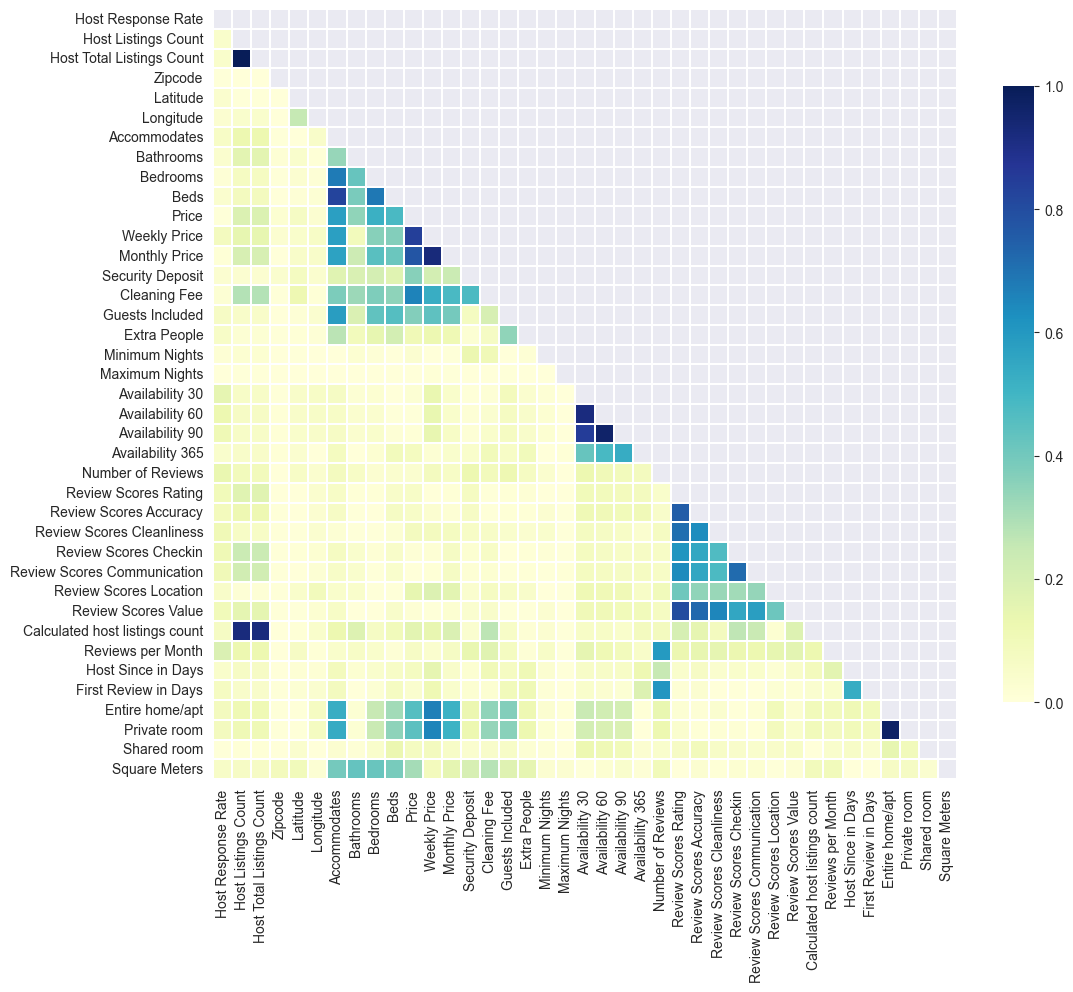

In [31]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(data_transform.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [32]:
# Obtenemos las variables que están menor correlacionadas con price
corr['Price'].sort_values(ascending=True).head(40)

Review Scores Communication       0.000306
Maximum Nights                    0.003067
Host Response Rate                0.006004
Availability 60                   0.007794
Availability 90                   0.008636
Review Scores Checkin             0.012502
Review Scores Value               0.018852
Availability 30                   0.021969
Zipcode                           0.024246
Minimum Nights                    0.030223
Longitude                         0.030609
Number of Reviews                 0.034579
First Review in Days              0.036353
Review Scores Rating              0.055693
Review Scores Accuracy            0.055821
Reviews per Month                 0.064821
Latitude                          0.070191
Host Since in Days                0.077309
Shared room                       0.077604
Availability 365                  0.078253
Review Scores Cleanliness         0.084095
Extra People                      0.108057
Review Scores Location            0.145767
Calculated 

## Con esto tenemos ya los datos limpios, entre comillas, podemos ahora separar en train y test

In [33]:
## Vamos a guardar los datos en un csv y de ahi los volvemos a tomar
data_transform.to_csv('data_transform.csv', index=False)

In [34]:
# Tomamos los recursos de apoyo para dividir en train y test
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./data_transform.csv', sep=',', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él.

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10588, 39)
Dimensiones del dataset de test: (2648, 39)


In [35]:
# Volvemos a revisar los porcentajes de nulos
df_train.isna().mean()*100

Host Response Rate                12.211938
Host Listings Count                0.018889
Host Total Listings Count          0.018889
Zipcode                            3.466188
Latitude                           0.000000
Longitude                          0.000000
Accommodates                       0.000000
Bathrooms                          0.406120
Bedrooms                           0.160559
Beds                               0.396675
Price                              0.085002
Weekly Price                      74.631658
Monthly Price                     74.726105
Security Deposit                  57.291273
Cleaning Fee                      40.612014
Guests Included                    0.000000
Extra People                       0.000000
Minimum Nights                     0.000000
Maximum Nights                     0.000000
Availability 30                    0.000000
Availability 60                    0.000000
Availability 90                    0.000000
Availability 365                

In [36]:
# Vamos a ver que dicen los valores
df_train.describe().T

count          mean          std  \
Host Response Rate               9295.0     94.676600    15.577451   
Host Listings Count             10586.0      9.845362    27.757445   
Host Total Listings Count       10586.0      9.845362    27.757445   
Zipcode                         10221.0  28025.059779  2560.558456   
Latitude                        10588.0     40.420524     0.020088   
Longitude                       10588.0     -3.697082     0.023552   
Accommodates                    10588.0      3.192577     1.998827   
Bathrooms                       10545.0      1.251257     0.595455   
Bedrooms                        10571.0      1.292971     0.825771   
Beds                            10546.0      1.992414     1.535834   
Price                           10579.0     65.975045    56.657140   
Weekly Price                     2686.0    368.858153   190.304534   
Monthly Price                    2676.0   1345.905456  1002.818132   
Security Deposit                 4522.0    184.293897   109.271876   
Cleaning Fee                     6288.0     29.557093    26.200890   
Guests Included                 10588.0      1.570457     1.075520   
Extra People                    10588.0      7.515678    11.140551   
Minimum Nights                  10588.0      2.948149    12.558756   
Maximum Nights                  10588.0    977.769456  9917.874738   
Availability 30                 10588.0      8.735927     9.065506   
Availability 60                 10588.0     22.967605    19.443684   
Availability 90                 10588.0     40.217038    29.231059   
Availability 365                10588.0    206.676237   126.733635   
Number of Reviews               10588.0     23.339913    38.646267   
Review Scores Rating             8316.0     91.761544     8.670851   
Review Scores Accuracy           8299.0      9.419569     0.905186   
Review Scores Cleanliness        8306.0      9.340477     0.972786   
Review Scores Checkin            8292.0      9.628919     0.776353   
Review Scores Communication      8307.0      9.652582     0.741218   
Review Scores Location           8290.0      9.551025     0.747128   
Review Scores Value              8290.0      9.223281     0.931462   
Calculated host listings count  10588.0      7.725161    20.058124   
Reviews per Month                8415.0      1.936635     1.892194   
Host Since in Days              10586.0    906.223786   583.930377   
First Review in Days             8414.0    405.066793   422.699758   
Entire home/apt                 10588.0      0.597091     0.490506   
Private room                    10588.0      0.388553     0.487444   
Shared room                     10588.0      0.014356     0.118958   
Square Meters                     429.0     35.628409    52.462726   

                                       min           25%           50%  \
Host Response Rate                0.000000    100.000000    100.000000   
Host Listings Count               0.000000      1.000000      2.000000   
Host Total Listings Count         0.000000      1.000000      2.000000   
Zipcode                          28.000000  28005.000000  28012.000000   
Latitude                         40.331888     40.410089     40.418592   
Longitude                        -3.822403     -3.707749     -3.701537   
Accommodates                      1.000000      2.000000      2.000000   
Bathrooms                         0.000000      1.000000      1.000000   
Bedrooms                          0.000000      1.000000      1.000000   
Beds                              1.000000      1.000000      2.000000   
Price                             9.000000     31.000000     52.000000   
Weekly Price                     70.000000    210.000000    350.000000   
Monthly Price                   250.000000    700.000000   1200.000000   
Security Deposit                 70.000000    100.000000    150.000000   
Cleaning Fee                      4.000000     15.000000     25.000000   
Guests Included                   1.000000      1

#### Es probable que tengamos muchos valores nulos en varias columnas, pero vamos a ver que podemos hacer con ellas

<AxesSubplot: xlabel='Square Meters', ylabel='Square Meters'>

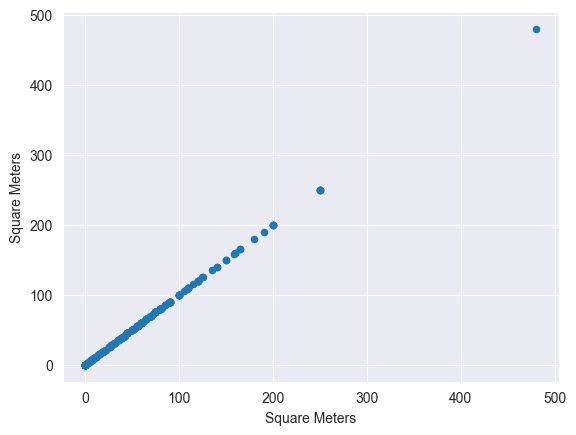

In [37]:
# Aquí podemos ver que en el caso de los pies cuadrados hay outliers, en este caso vamos a revisar estadisticamente si existe evidencia y como podemos filtrar
df_train.plot(kind='scatter', x='Square Meters', y='Square Meters')

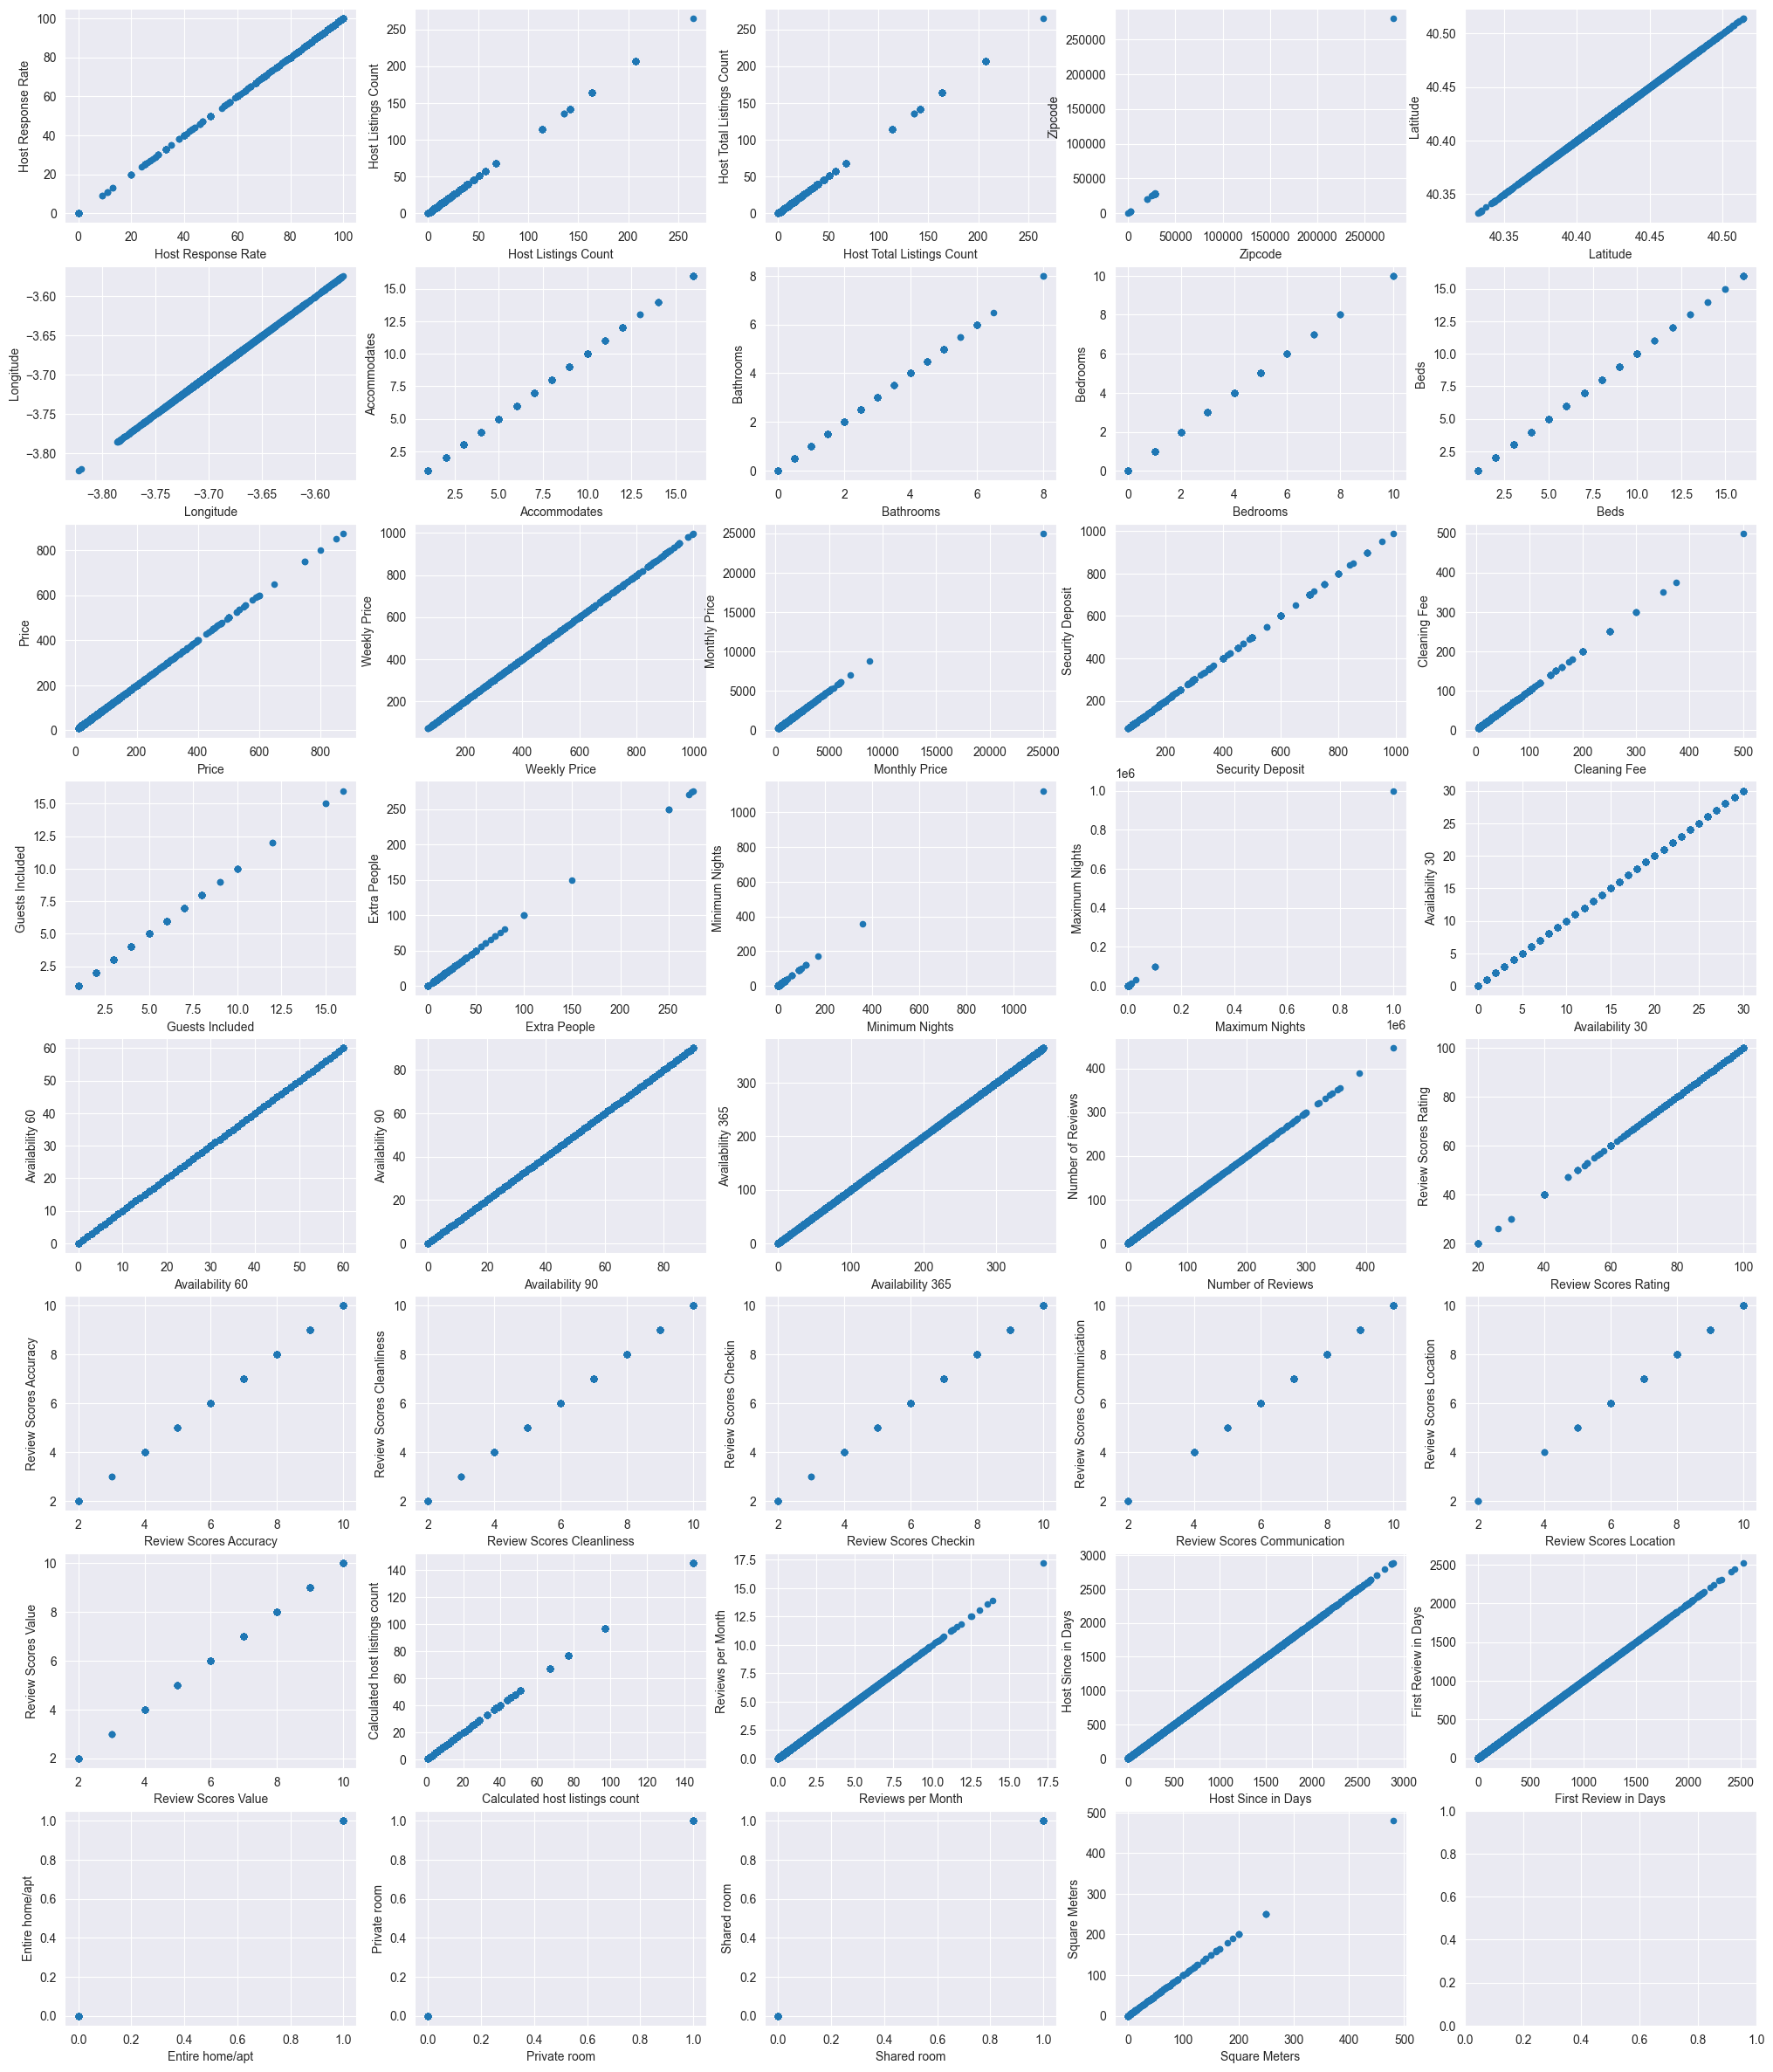

In [38]:
# Vamos a graficar cada columna en scatter para ver si hay outliers, lo vamos a mostrar en subplot
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(df_train.columns, ax.flatten()):
    df_train.plot(kind='scatter', x=variable, y=variable, ax=subplot)

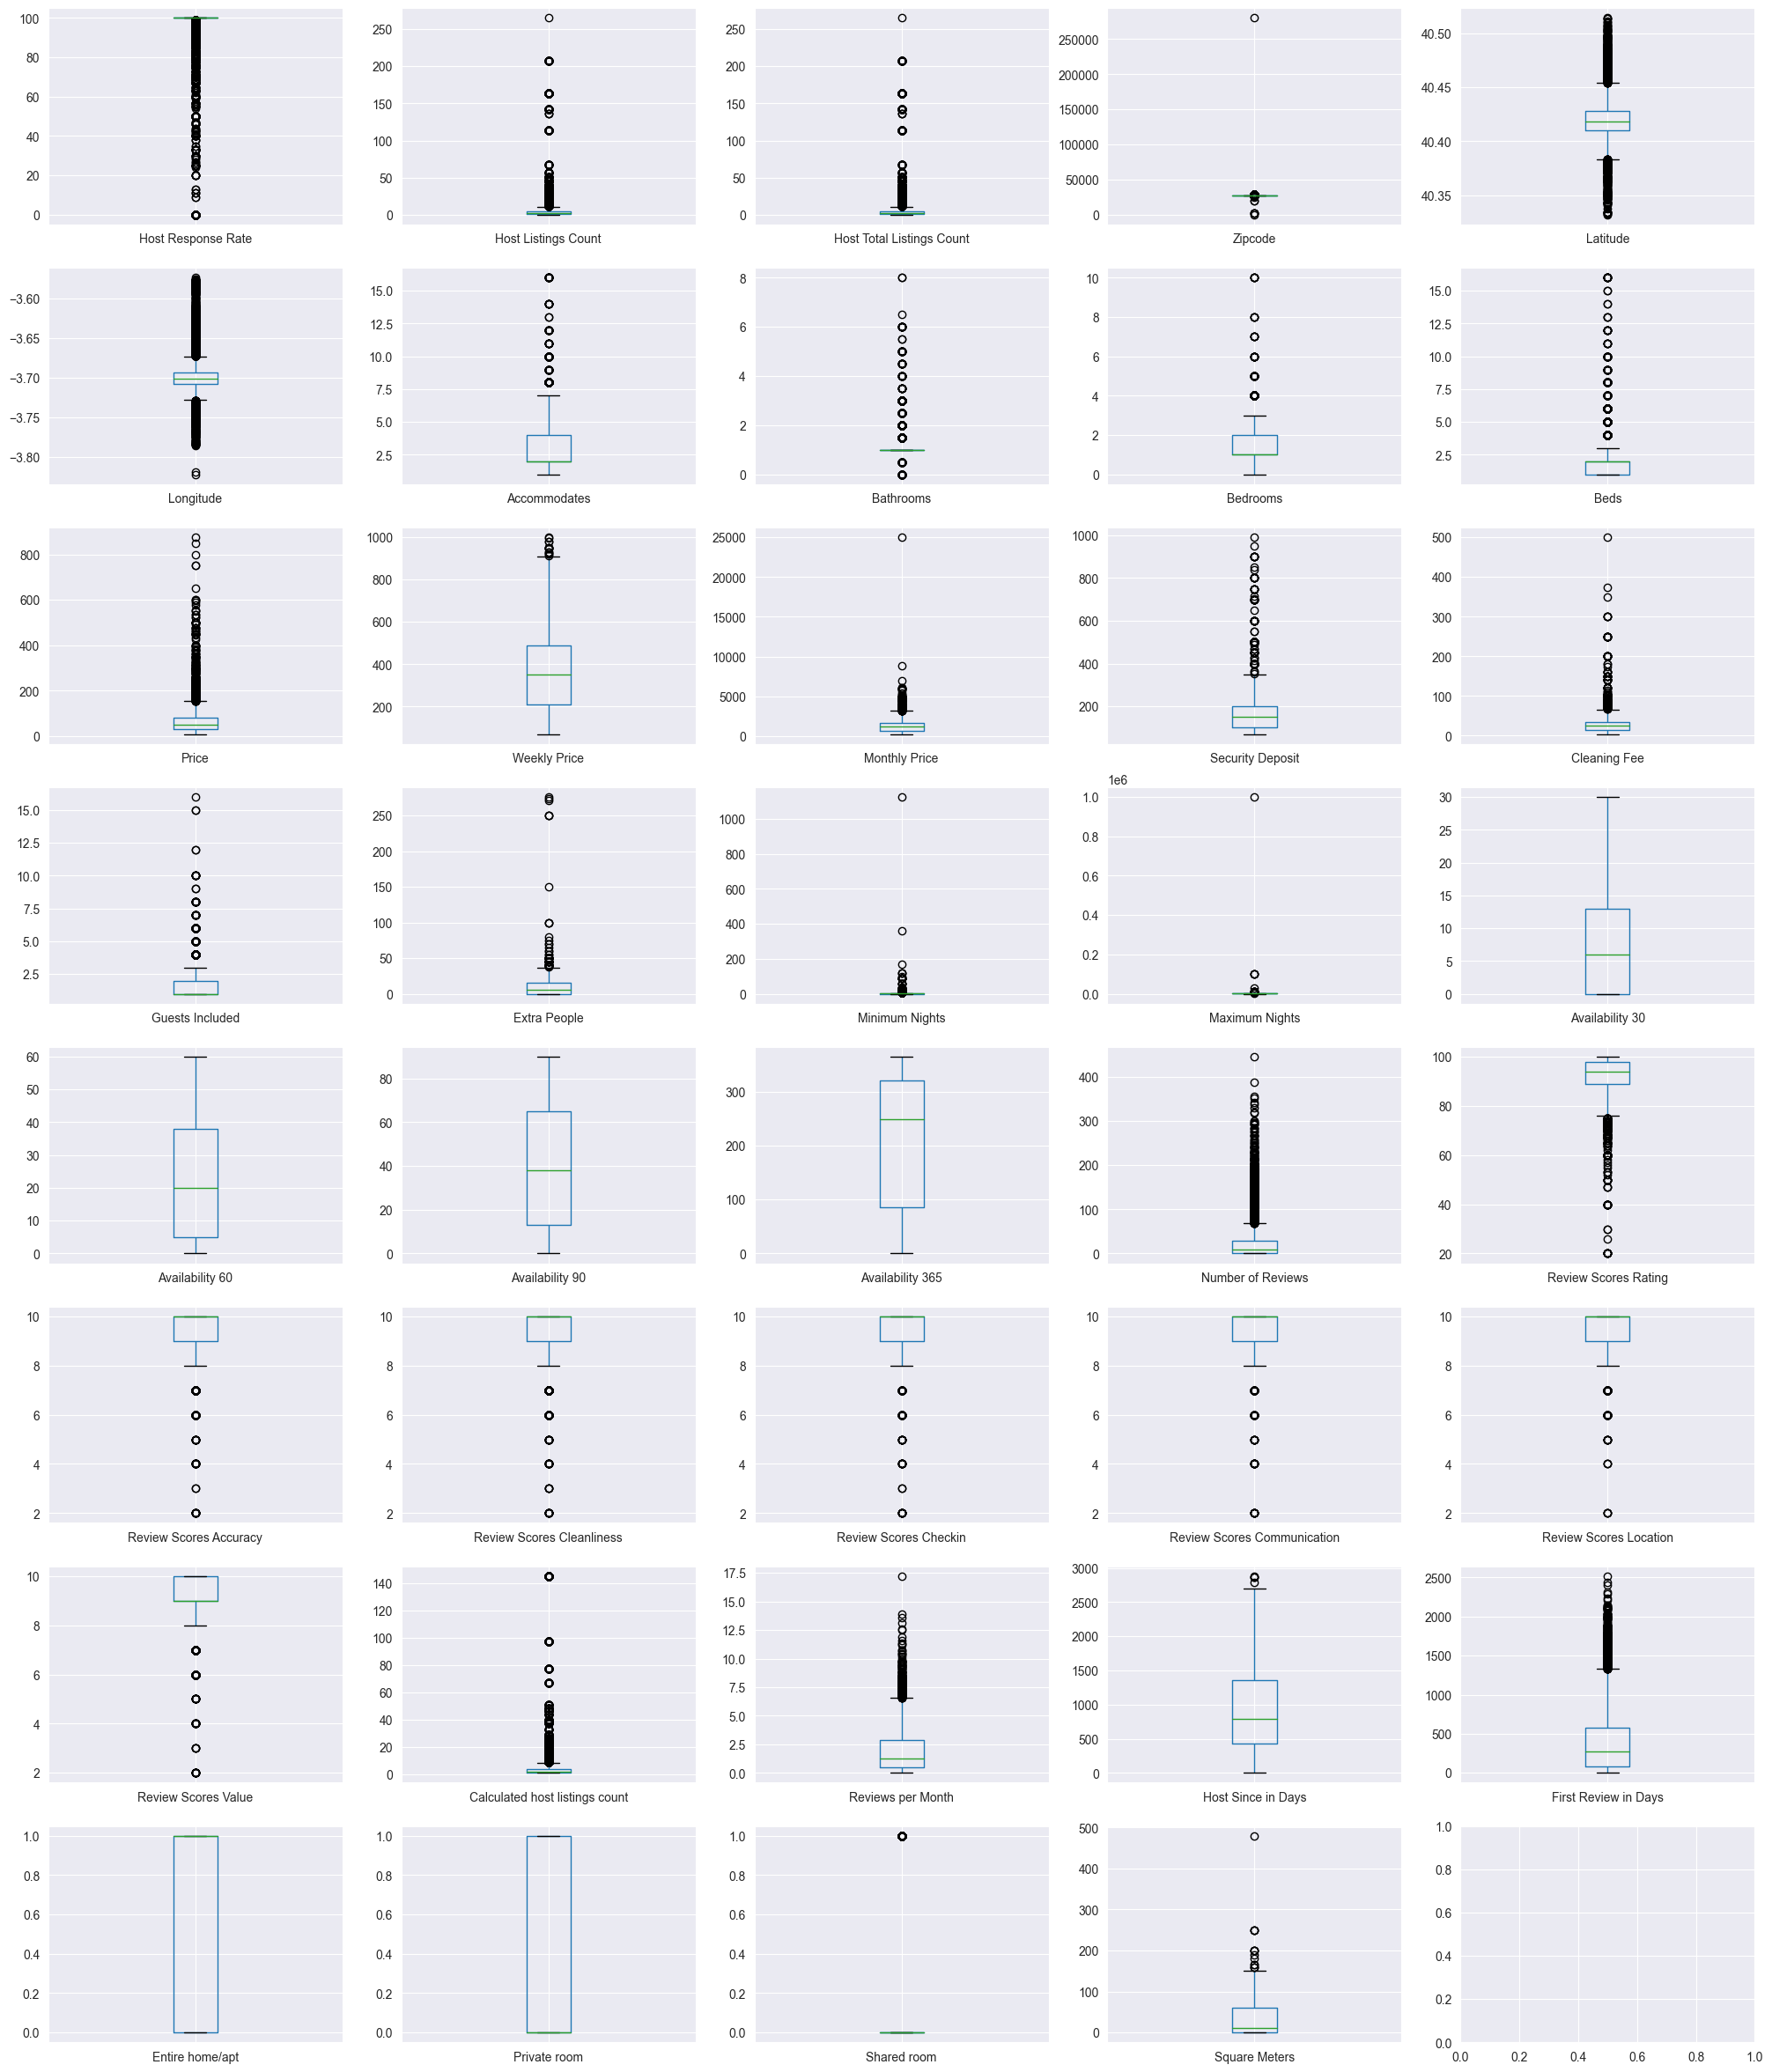

In [39]:
# Vamos a graficar cada columna en boxplot para ver si hay outliers, lo vamos a mostrar en subplot
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(df_train.columns, ax.flatten()):
    df_train.boxplot(column=variable, ax=subplot)

#### Vamos a hacer un primer filtrado de los outliers bajo criterio de observación

In [43]:
# Obtenemos las filas del dataframe que, basados en la columna Zipcode, se consideran outliers
outliers = df_train[df_train['Zipcode'] > 99999]
print(outliers.index.to_list())
# Añadir al objeto outliers las filas del dataframe que, basados en la columna Montly Price, se consideran outliers
outliers = outliers.append(df_train[df_train['Monthly Price'] > 7000])
print(outliers.index.to_list())
# Obtenemos las filas del dataframe que, basados en la columna Square Meters, se consideran outliers
outliers = outliers.append(df_train[df_train['Square Meters'] > 300])
# Obtenemos las filas del dataframe que, basados en la columna Cleaning Fee, se consideran outliers
outliers = outliers.append(df_train[df_train['Cleaning Fee'] > 299])
# Obtenemos las filas del dataframe que, basados en la columna Extra People, se consideran outliers
outliers = outliers.append(df_train[df_train['Extra People'] > 100])
# Obtenemos las filas del dataframe que, basados en la columna Minimum Nights, se consideran outliers
outliers = outliers.append(df_train[df_train['Minimum Nights'] > 40])
# Obtenemos las filas del dataframe que, basados en la columna Maximum Nights, se consideran outliers
outliers = outliers.append(df_train[df_train['Maximum Nights'] > 2500])
outliers

[]
[]


Host Response Rate  Host Listings Count  Host Total Listings Count  \
4899               100.0                  1.0                        1.0   

      Zipcode   Latitude  Longitude  Accommodates  Bathrooms  Bedrooms  Beds  \
4899  28001.0  40.418257  -3.690208            16        5.0       5.0  13.0   

      ...  Review Scores Location  Review Scores Value  \
4899  ...                    10.0                 10.0   

      Calculated host listings count  Reviews per Month  Host Since in Days  \
4899                             1.0               0.88              1497.0   

      First Review in Days  Entire home/apt  Private room  Shared room  \
4899                1244.0                1             0            0   

      Square Meters  
4899     480.029801  

[1 rows x 39 columns]

In [44]:
# Eliminamos los outliers, no son muchas filas
df_train = df_train.drop(outliers.index.to_list())

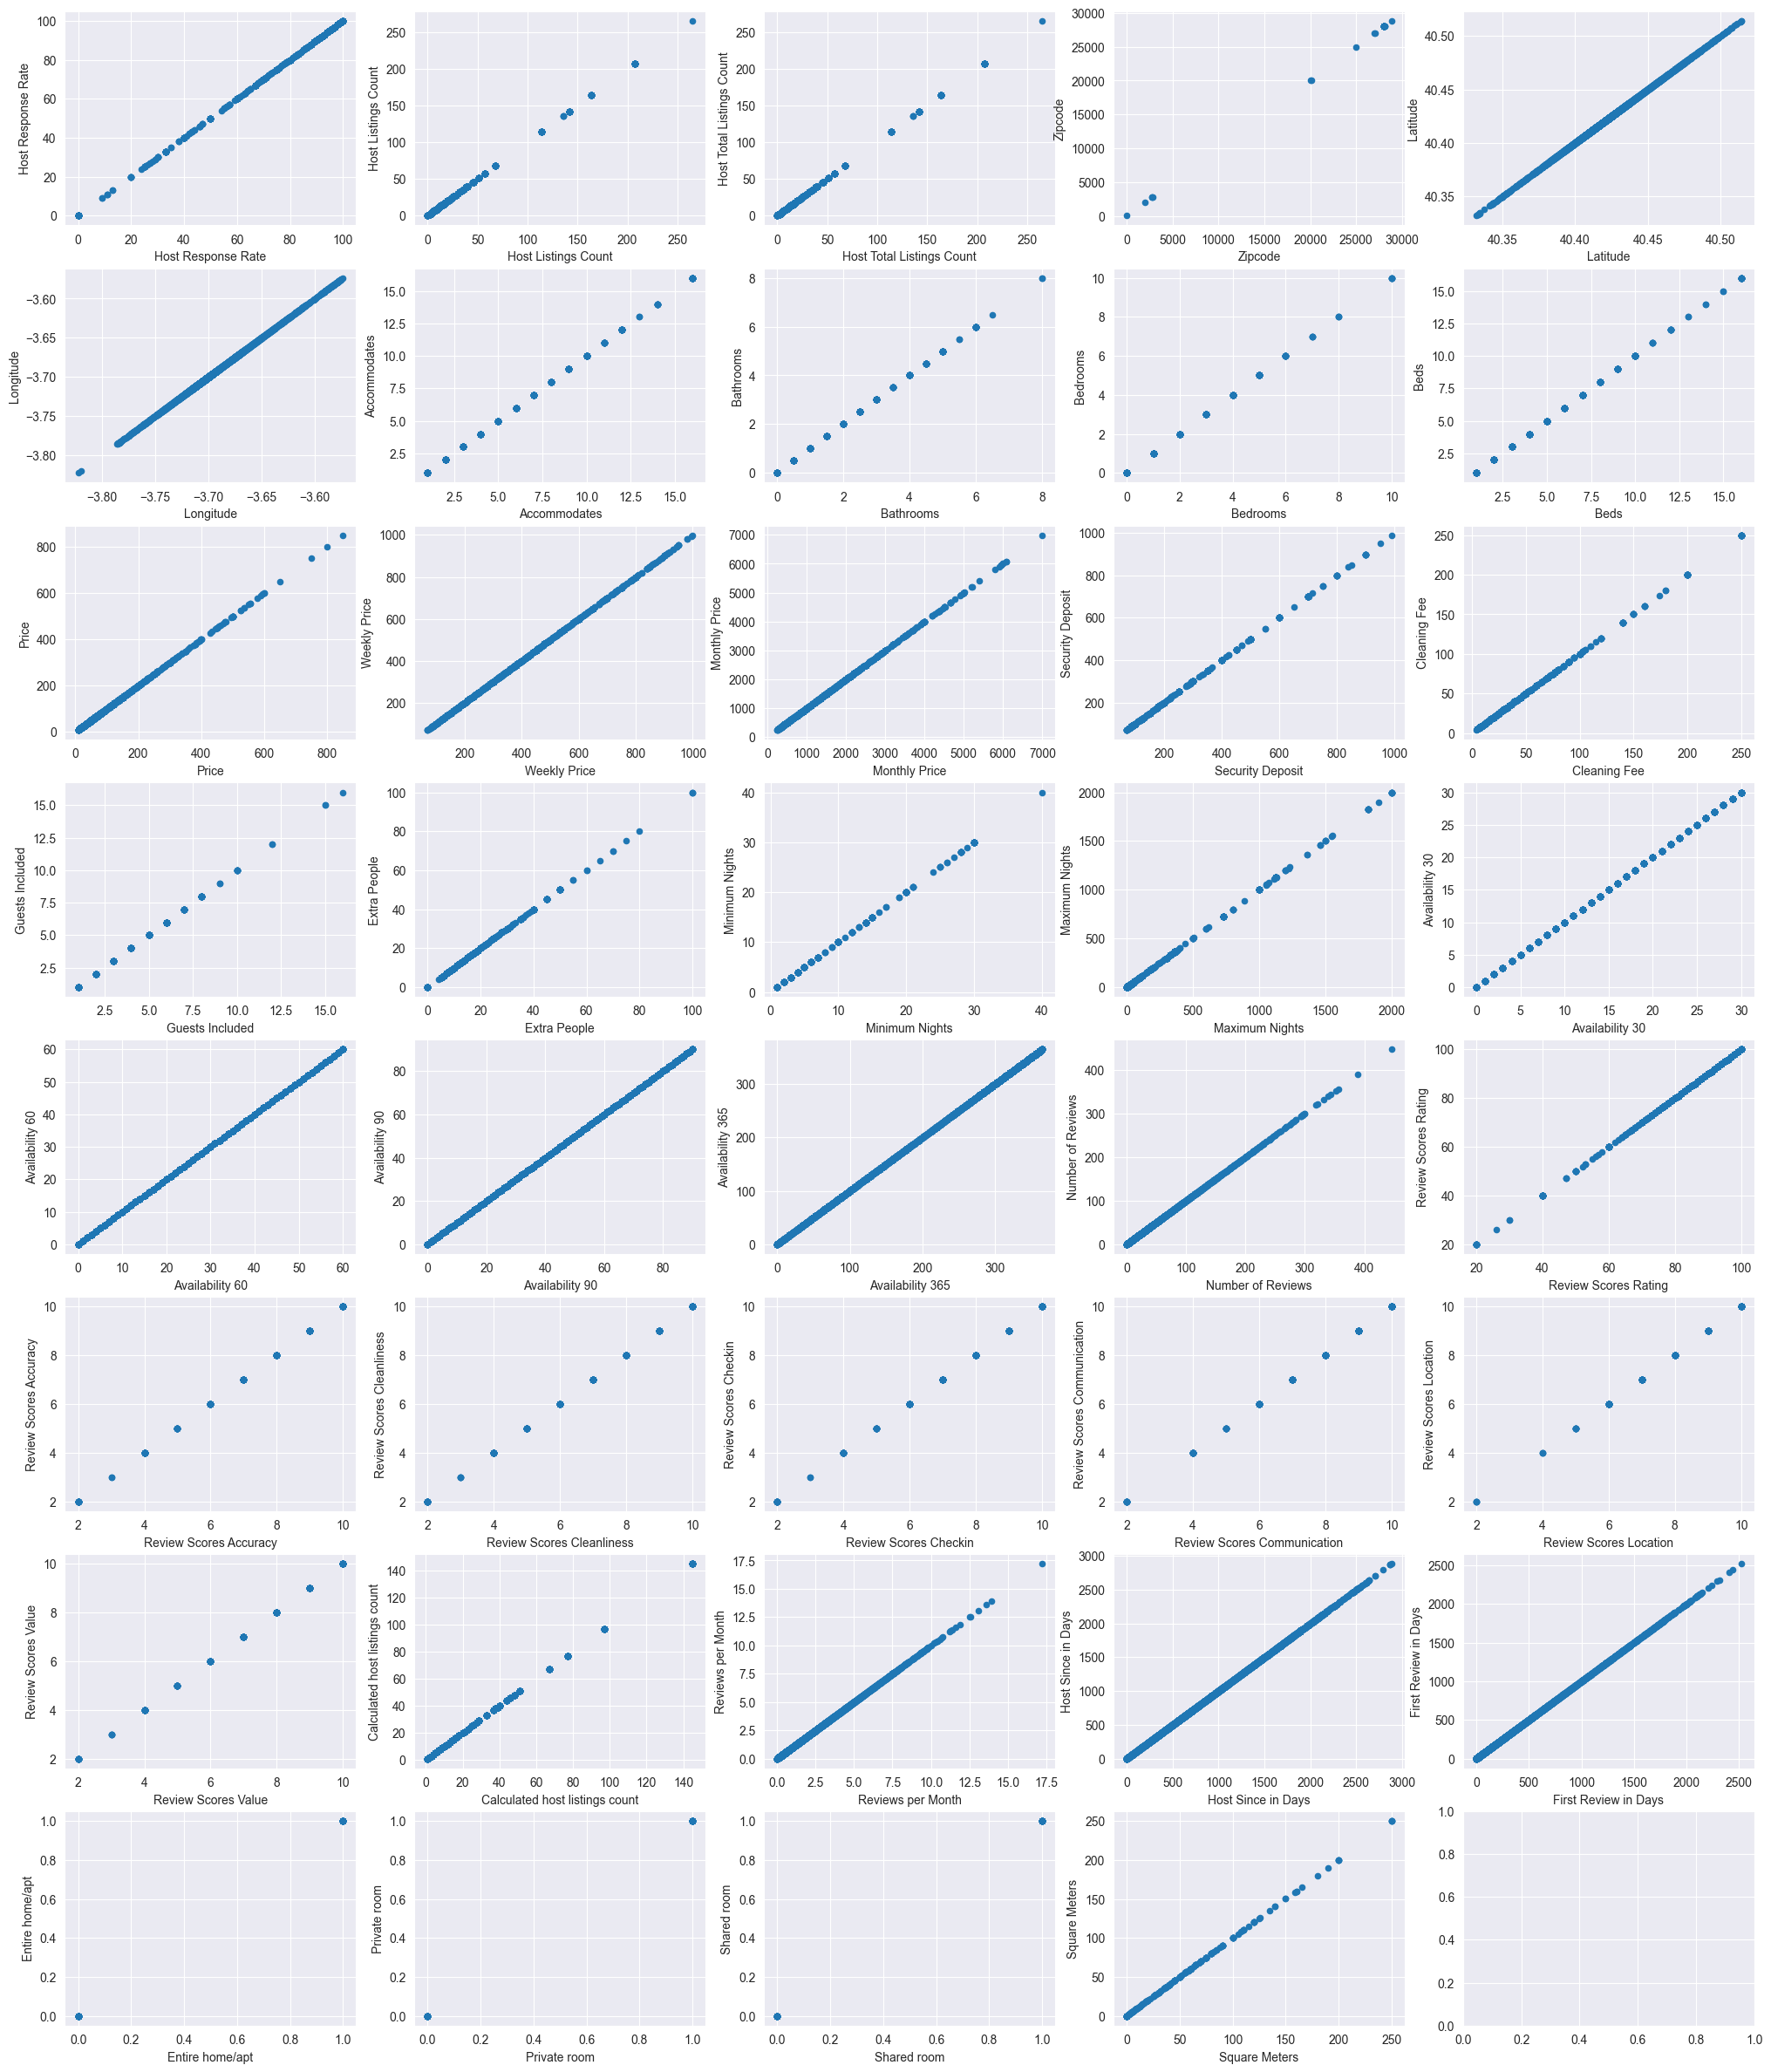

In [45]:
# Comprobamos los cambios
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(df_train.columns, ax.flatten()):
    df_train.plot(kind='scatter', x=variable, y=variable, ax=subplot)

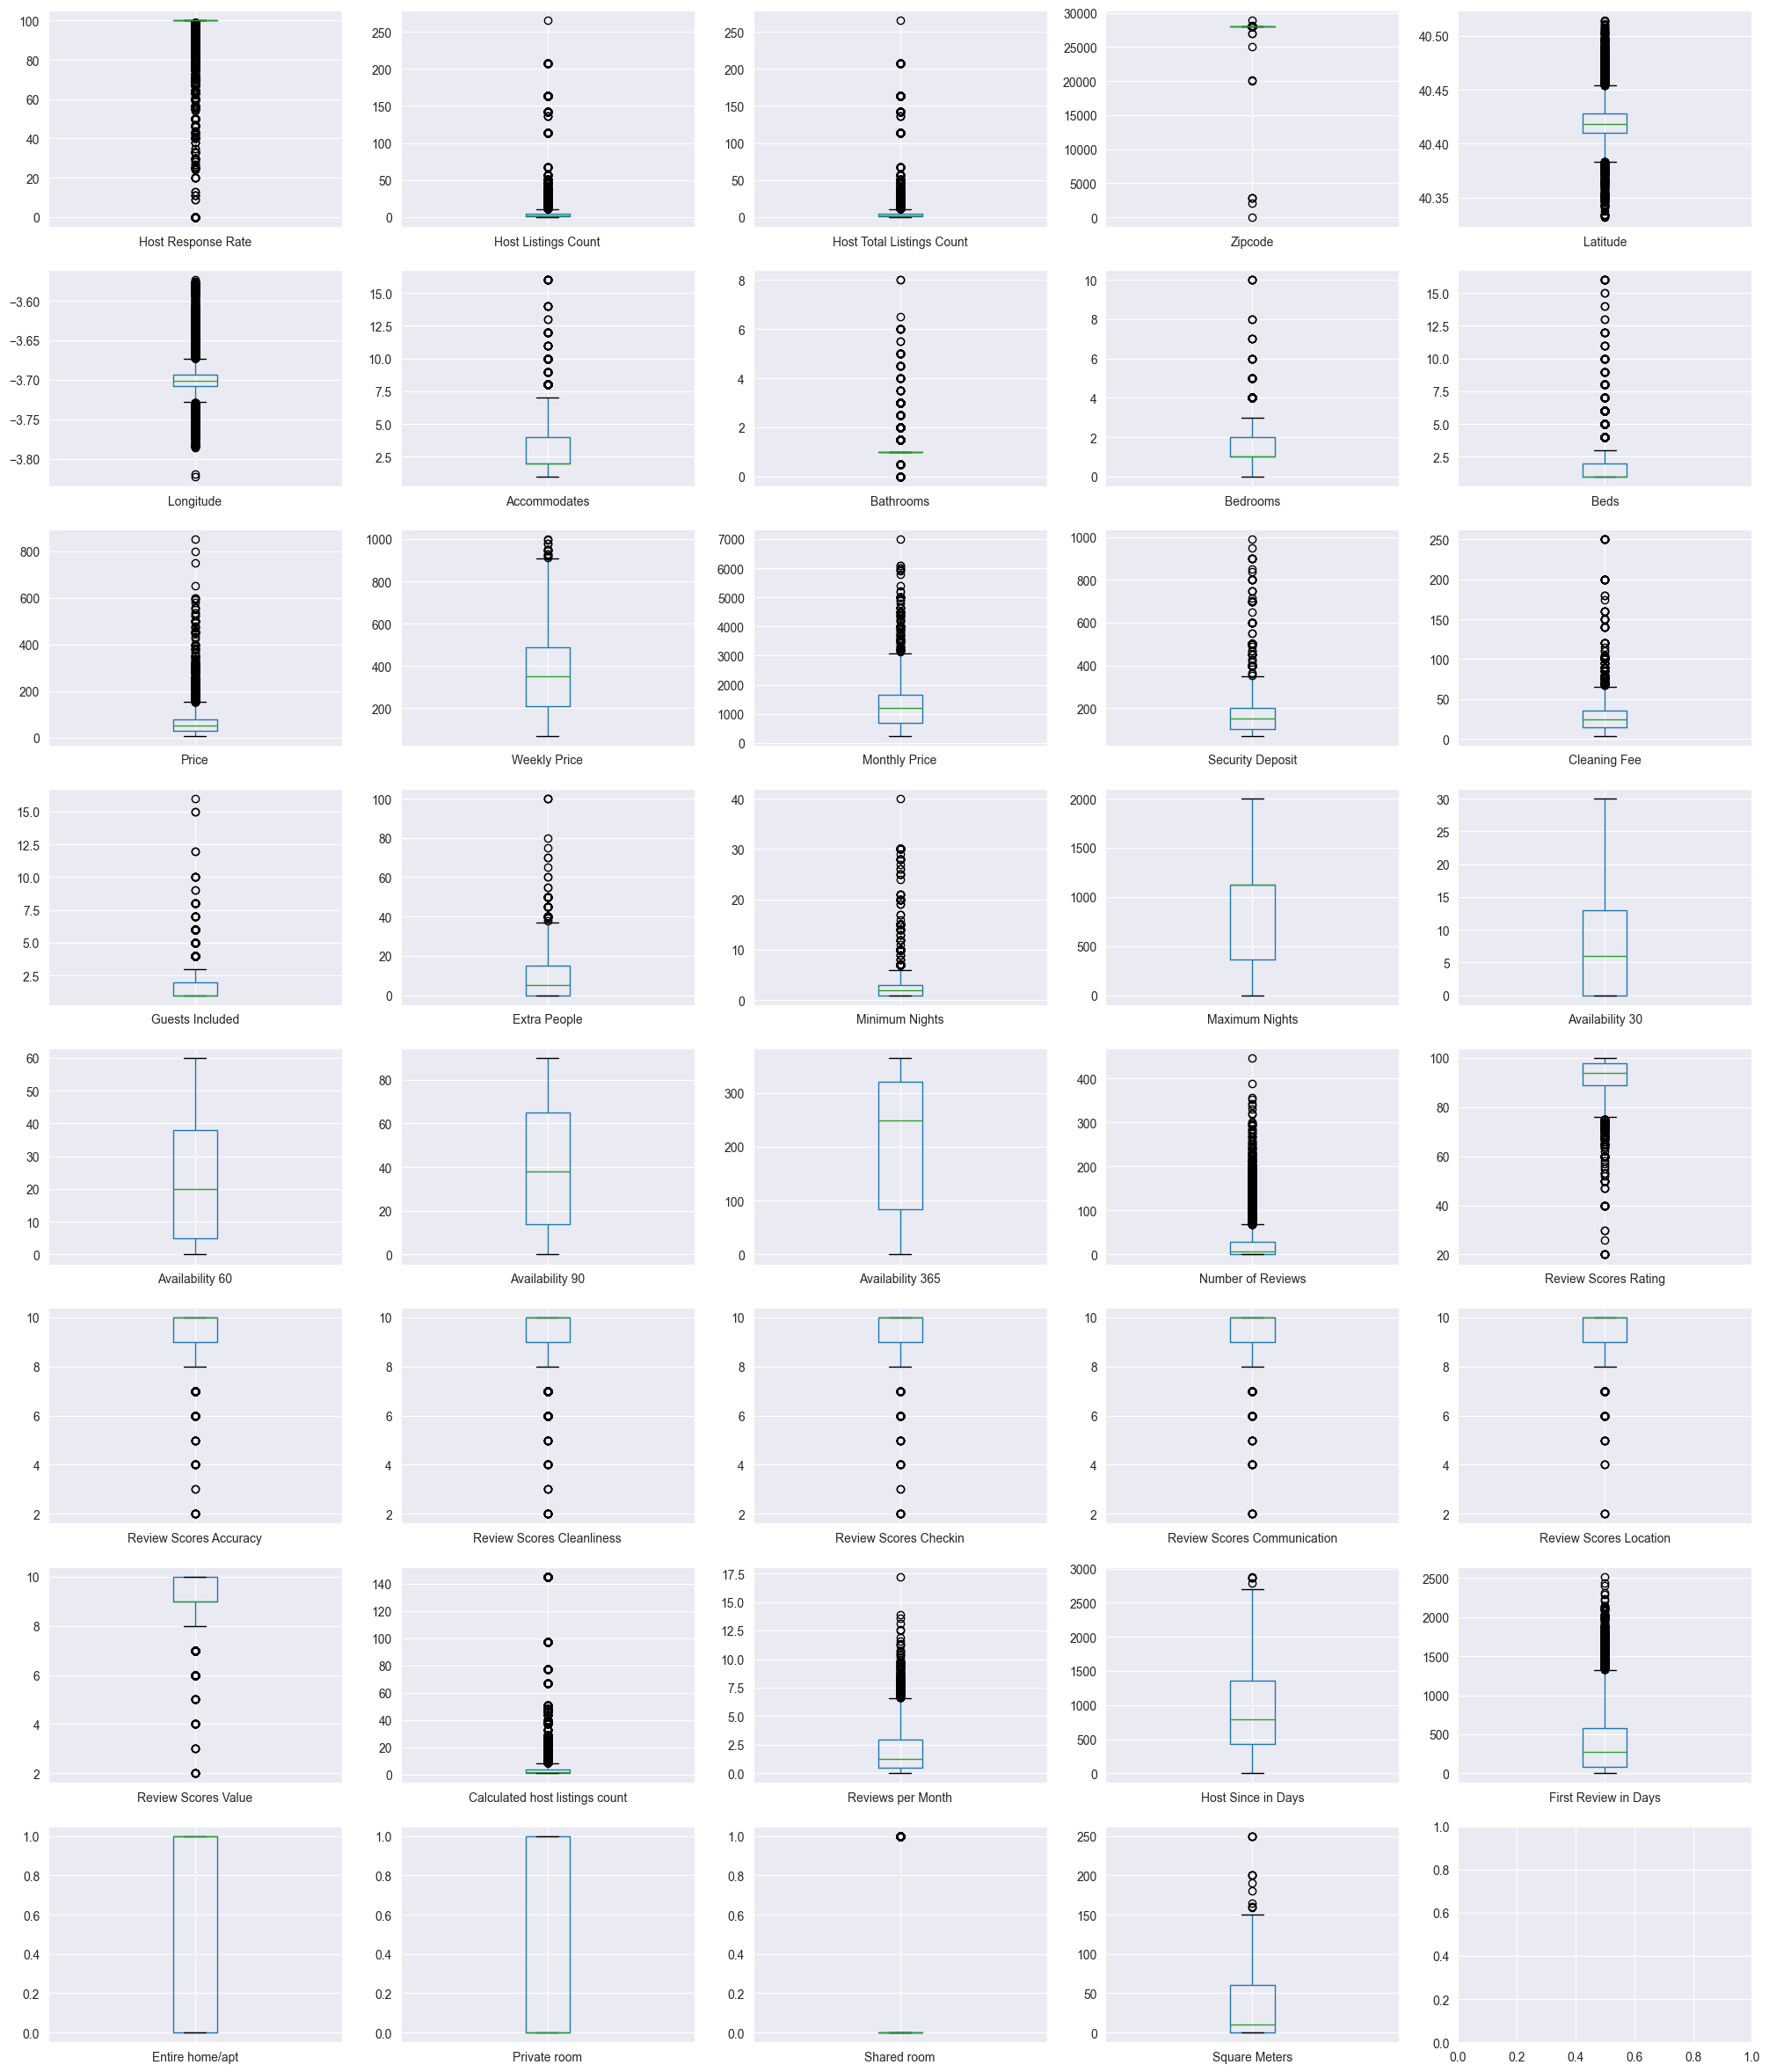

In [46]:
# Vamos a graficar cada columna en boxplot para ver si hay outliers, lo vamos a mostrar en subplot
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(df_train.columns, ax.flatten()):
    df_train.boxplot(column=variable, ax=subplot)

In [47]:
# para la columna Zipcode vamos a reemplazar los outliers menores a 20000 por NaN
df_train['Zipcode'] = df_train['Zipcode'].apply(lambda x: np.nan if x < 20000 else x)

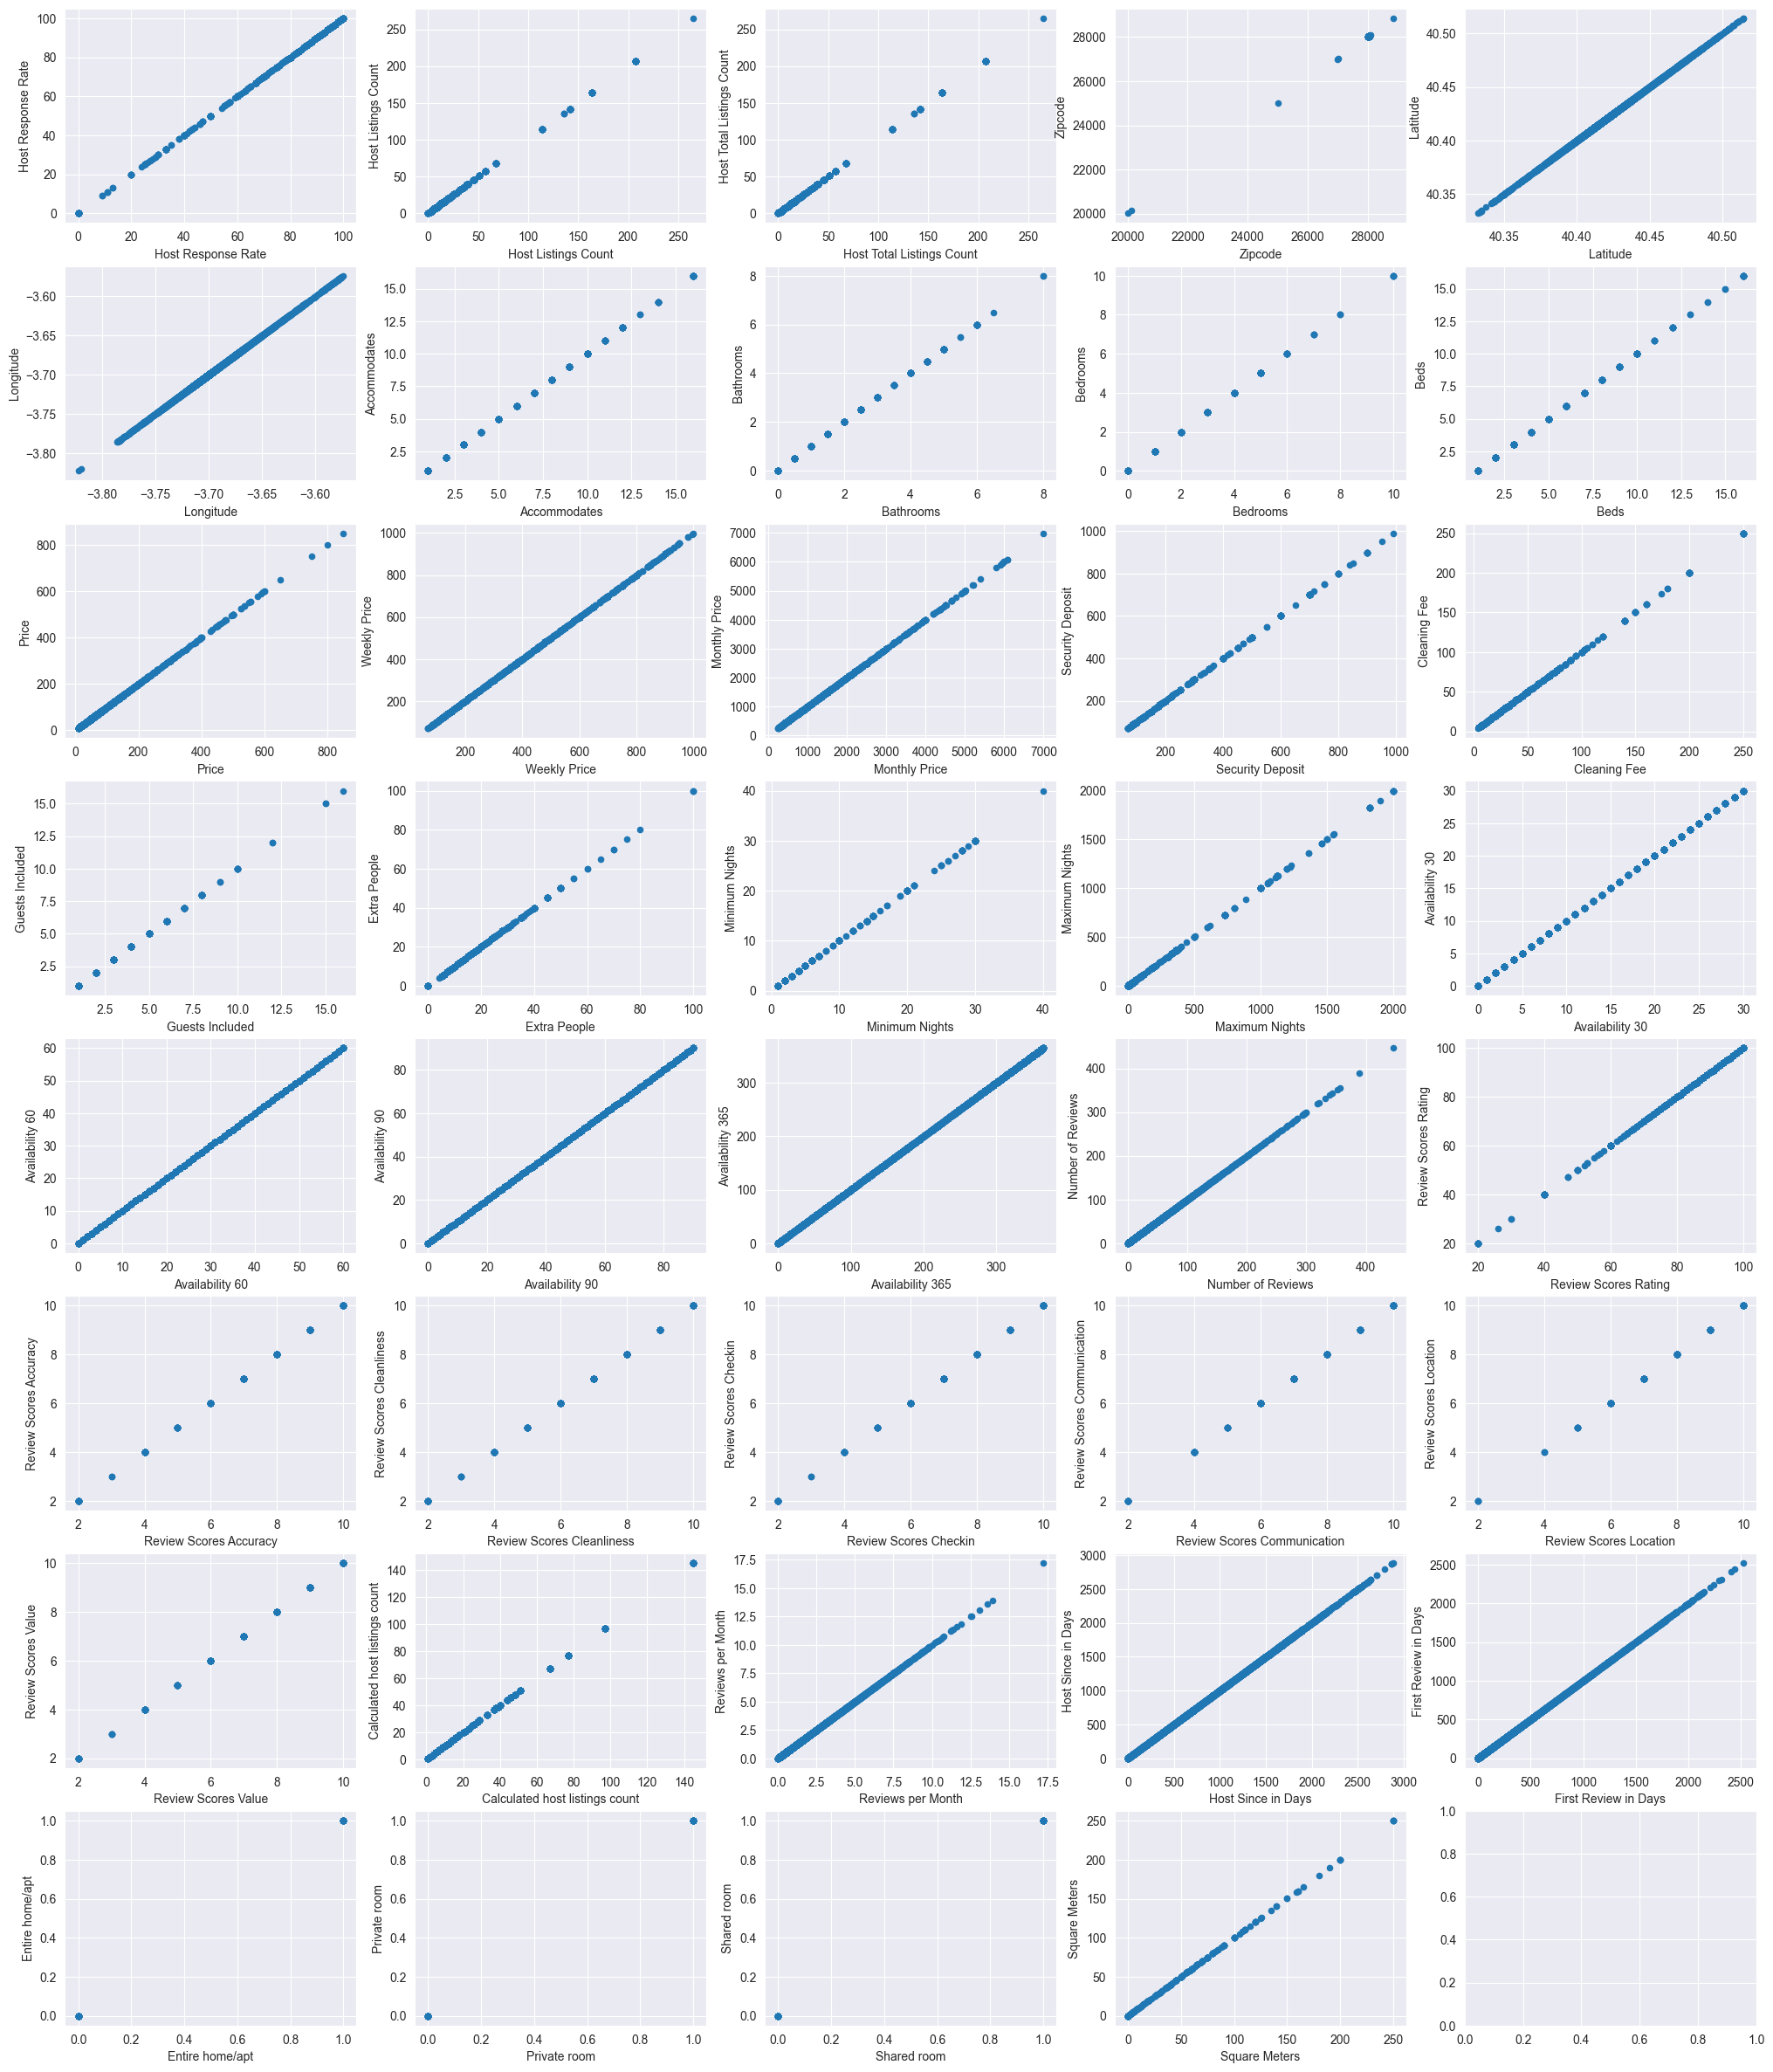

In [48]:
# Comprobamos los cambios
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(df_train.columns, ax.flatten()):
    df_train.plot(kind='scatter', x=variable, y=variable, ax=subplot)

In [49]:
# Volvemos a revisar los porcentajes de nulos
df_train.isna().mean()*100

Host Response Rate                12.181922
Host Listings Count                0.018990
Host Total Listings Count          0.018990
Zipcode                            3.503608
Latitude                           0.000000
Longitude                          0.000000
Accommodates                       0.000000
Bathrooms                          0.408280
Bedrooms                           0.161413
Beds                               0.398785
Price                              0.066464
Weekly Price                      74.648690
Monthly Price                     74.800608
Security Deposit                  57.320547
Cleaning Fee                      40.751994
Guests Included                    0.000000
Extra People                       0.000000
Minimum Nights                     0.000000
Maximum Nights                     0.000000
Availability 30                    0.000000
Availability 60                    0.000000
Availability 90                    0.000000
Availability 365                

<AxesSubplot: xlabel='Square Meters', ylabel='Price'>

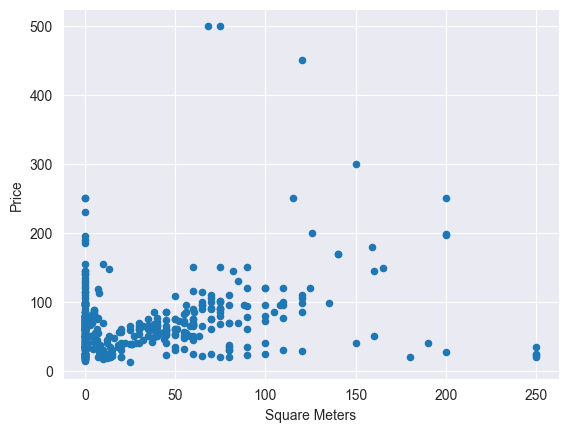

In [51]:
# Hacemos un scatter plot entre el precio y los metros cuadrados
df_train.plot(kind='scatter', x='Square Meters', y='Price')

In [52]:
# al observar que tenemos ceros en la columna Square Meters, vamos a reemplazarlos por NaN
df_train['Square Meters'] = df_train['Square Meters'].apply(lambda x: np.nan if x == 0 else x)

<AxesSubplot: xlabel='Square Meters', ylabel='Price'>

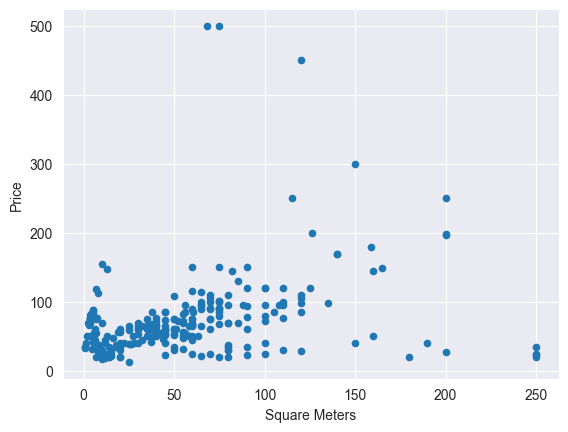

In [53]:
# Volvemos a hacer un scatter plot entre el precio y los pies cuadrados
df_train.plot(kind='scatter', x='Square Meters', y='Price')

### Vamos a rellenar los datos faltantes, vamos a ver los histogramas de cada columna para ver que se puede hacer


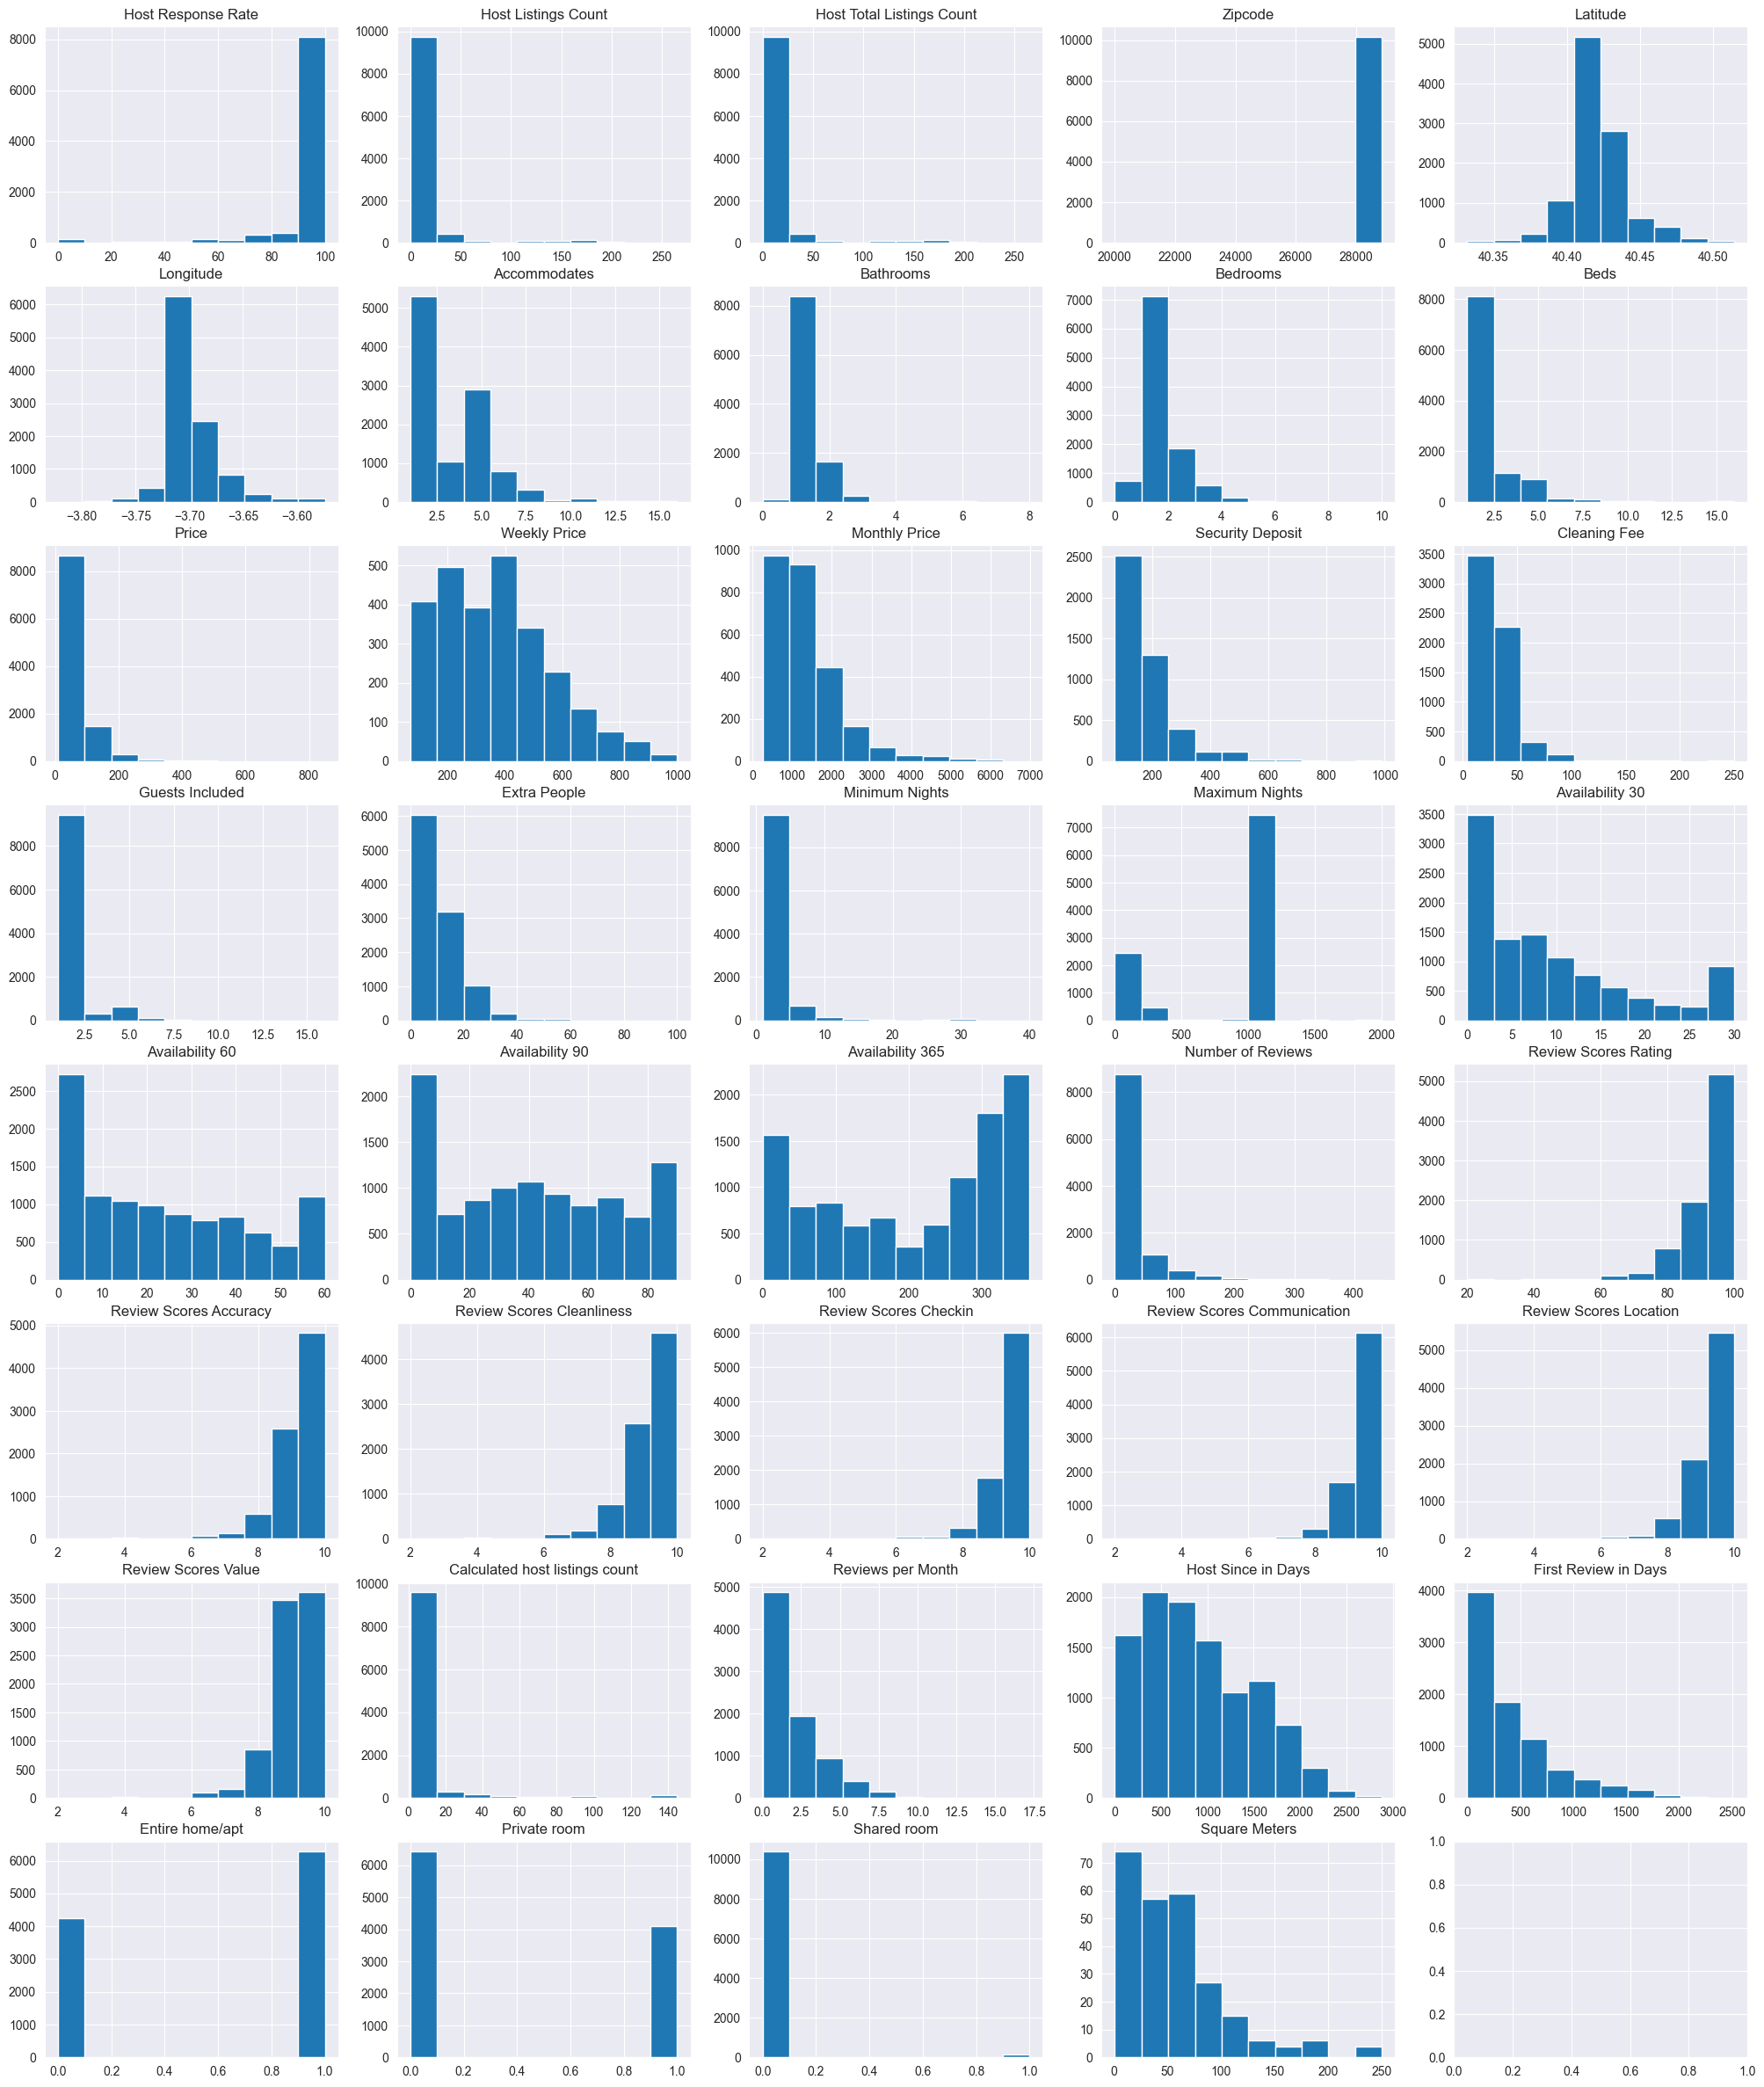

In [54]:
# Vamos a graficar cada columna en histograma con un bind de 10, lo vamos a mostrar en subplot con su respectiva etiqueta
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(df_train.columns, ax.flatten()):
    df_train[variable].hist(bins=10, ax=subplot)
    subplot.set_title(variable)

In [55]:
# Volvemos a revisar los porcentajes de nulos
df_train.isna().mean()*100

Host Response Rate                12.181922
Host Listings Count                0.018990
Host Total Listings Count          0.018990
Zipcode                            3.503608
Latitude                           0.000000
Longitude                          0.000000
Accommodates                       0.000000
Bathrooms                          0.408280
Bedrooms                           0.161413
Beds                               0.398785
Price                              0.066464
Weekly Price                      74.648690
Monthly Price                     74.800608
Security Deposit                  57.320547
Cleaning Fee                      40.751994
Guests Included                    0.000000
Extra People                       0.000000
Minimum Nights                     0.000000
Maximum Nights                     0.000000
Availability 30                    0.000000
Availability 60                    0.000000
Availability 90                    0.000000
Availability 365                

#### Si queremos mantener la coherencia de la distribución sobre las columnas que tienen mas del 40% de missing data, entonces vamos a tener que revisar cuidadosamente que se puede hacer, hacemos un primer análisis para la variable con mas missing data, que es Square Meters

<AxesSubplot: xlabel='Square Meters', ylabel='Density'>

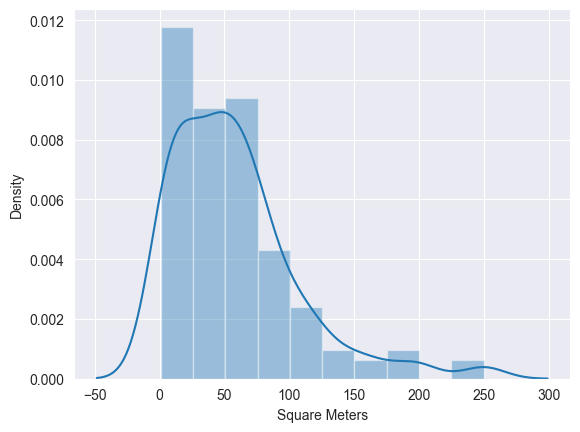

In [56]:
# Graficamos la funcion de densidad de probabilidad para la variable mas madreada, que es Square Meters
sns.distplot(df_train['Square Meters'], hist=True, kde=True, bins=10)

In [58]:
# Imprimimos la información importante sobre esta
df_train['Square Meters'].describe()

count    252.000000
mean      57.861979
std       49.646060
min        0.743224
25%       19.974145
50%       49.981814
75%       74.972721
max      250.001973
Name: Square Meters, dtype: float64

Statistics=0.867, p=0.00000
La muestra no parece Gaussiana (rechazamos H0)


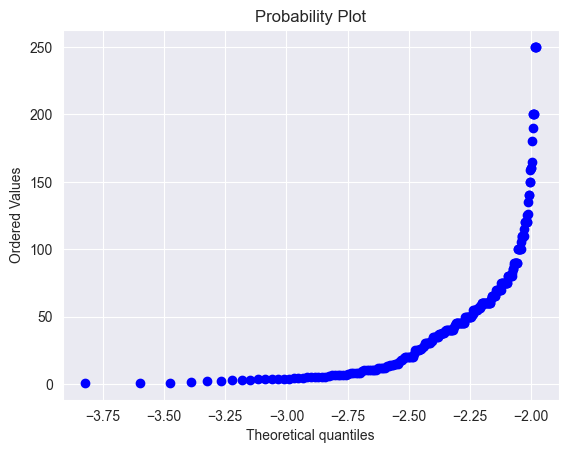

In [59]:
# Aplicamos el test de Shapiro-Wilk para ver si la distribución es normal, descartando los NaN

from scipy.stats import shapiro

stat, p = shapiro(df_train['Square Meters'].dropna())
print('Statistics=%.3f, p=%.5f' % (stat, p))
# Interpretamos el resultado
alpha = 0.05
if p > alpha:
    print('La muestra parece Gaussiana (no rechazamos H0)')
else:
    print('La muestra no parece Gaussiana (rechazamos H0)')

#Revisamos de forma gráfica la distribución de la columna Square Feet
from scipy.stats import probplot

data = df_train['Square Meters']
probplot(data, plot=plt)
plt.show()

#### De primera mano sabemos que podemos darla por perdida, pero en esta versión trataremos de hacer alguno que otro milagro en función de lo que tenemos, vamos a observar de forma gráfica como está el asunto

<AxesSubplot: >

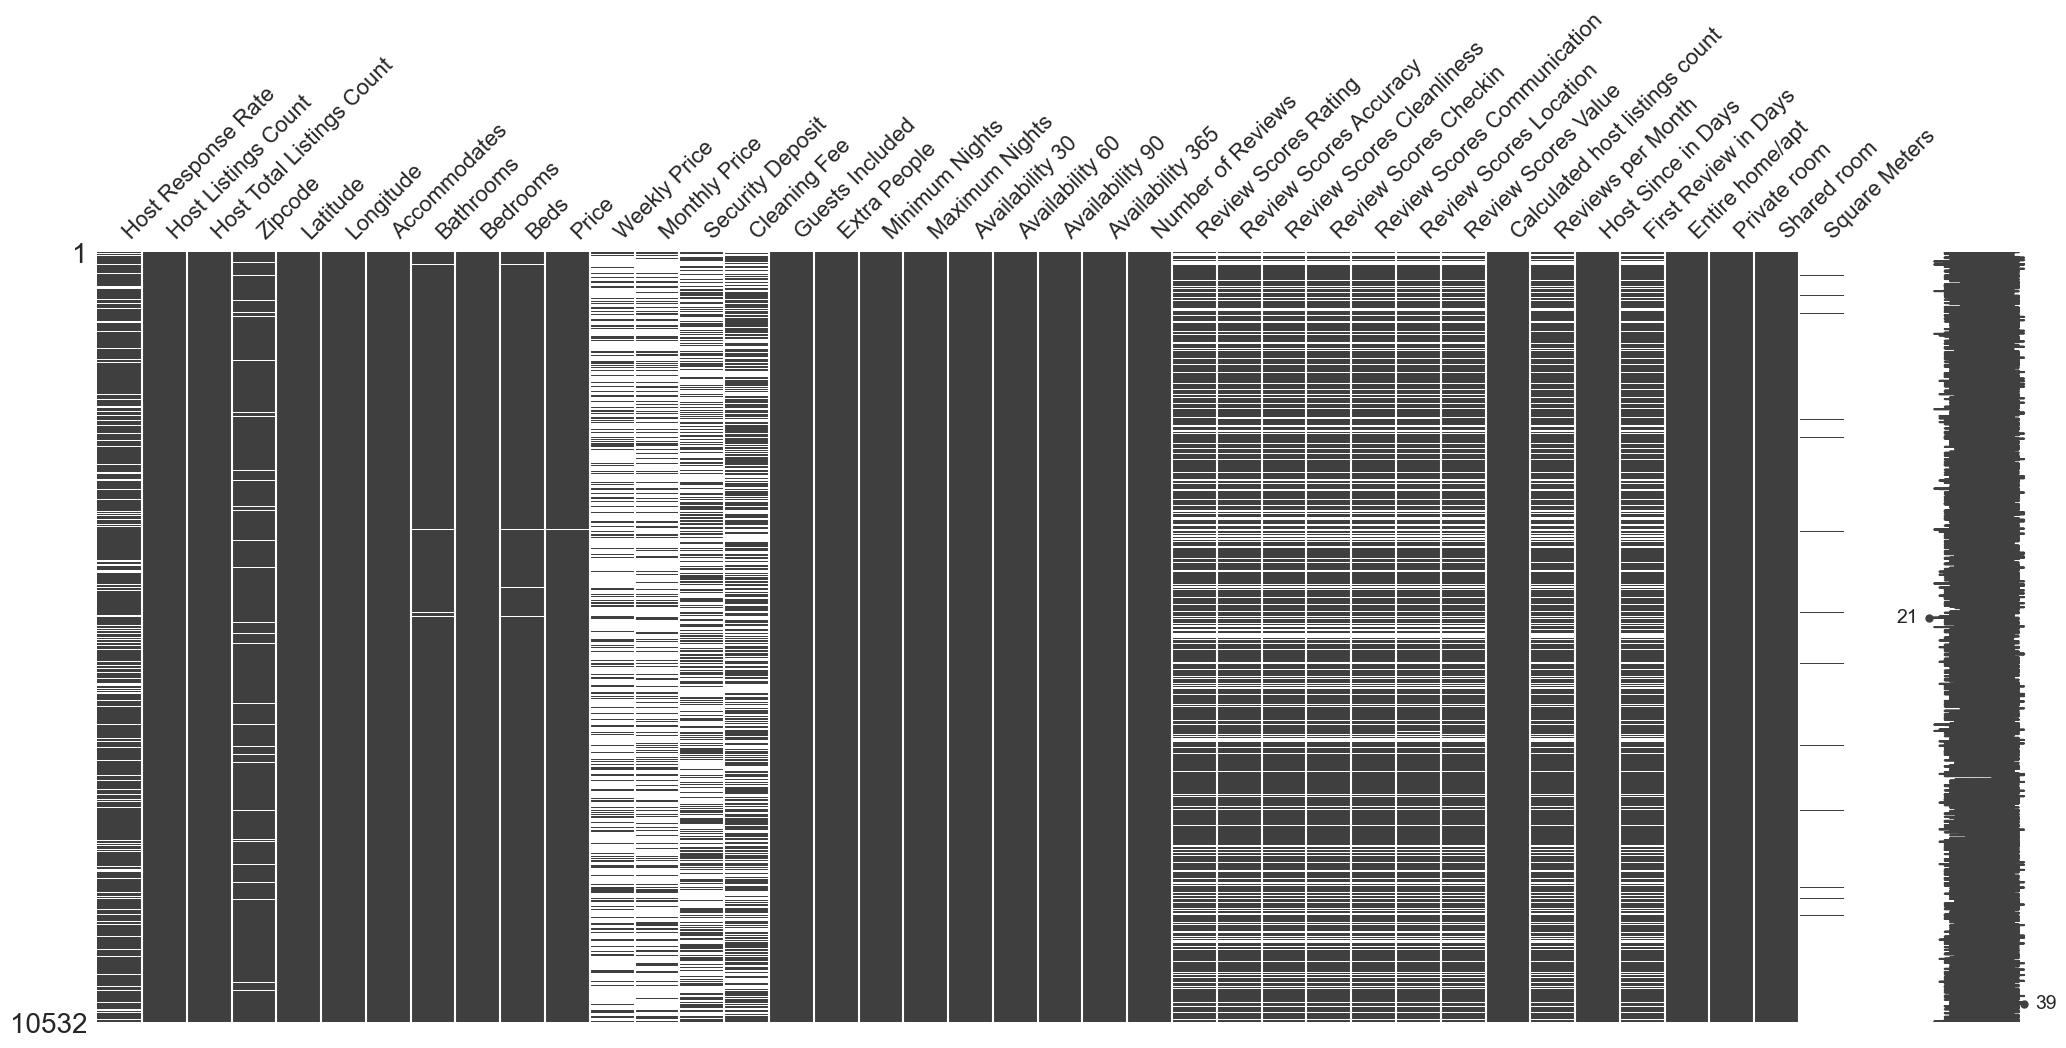

In [60]:
import missingno as msno

msno.matrix(df_train)

#### Terrible, se puede observar que mejor lo damos por muerto, pero como somos unos necios, vamos a ver que podemos hacer mas a profundidad, en primer lugar, observamos que hay algunos atributos que puede que no tengan salvación, pero como somos necios, vamos a ordenarlos y ver si podemos usar imputación en función de la correlación con otras variables

In [61]:
corr['Square Meters'].sort_values(ascending=False).head(40)

Square Meters                     1.000000
Bathrooms                         0.428335
Bedrooms                          0.419251
Accommodates                      0.395677
Beds                              0.390372
Price                             0.309082
Cleaning Fee                      0.279409
Security Deposit                  0.196275
Guests Included                   0.175152
Monthly Price                     0.154201
Extra People                      0.148685
Number of Reviews                 0.100785
Latitude                          0.095834
Reviews per Month                 0.095009
Calculated host listings count    0.091322
Zipcode                           0.089515
Weekly Price                      0.087590
Private room                      0.069341
Host Total Listings Count         0.066262
Host Listings Count               0.066262
Entire home/apt                   0.062823
Host Response Rate                0.055633
Availability 90                   0.042482
Shared room

#### Podemos ver la correlación anterior como por lo menos en un .30 existe correlación de los metros cuadrados con el precio

In [62]:
# Ordenamos en función del porcentaje de nulos
df_train.isna().mean().sort_values(ascending=False)*100

Square Meters                     97.607292
Monthly Price                     74.800608
Weekly Price                      74.648690
Security Deposit                  57.320547
Cleaning Fee                      40.751994
Review Scores Value               21.695784
Review Scores Location            21.695784
Review Scores Checkin             21.676795
Review Scores Accuracy            21.610330
Review Scores Cleanliness         21.543866
Review Scores Communication       21.534371
Review Scores Rating              21.448918
First Review in Days              20.537410
Reviews per Month                 20.527915
Host Response Rate                12.181922
Zipcode                            3.503608
Bathrooms                          0.408280
Beds                               0.398785
Bedrooms                           0.161413
Price                              0.066464
Host Listings Count                0.018990
Host Total Listings Count          0.018990
Host Since in Days              

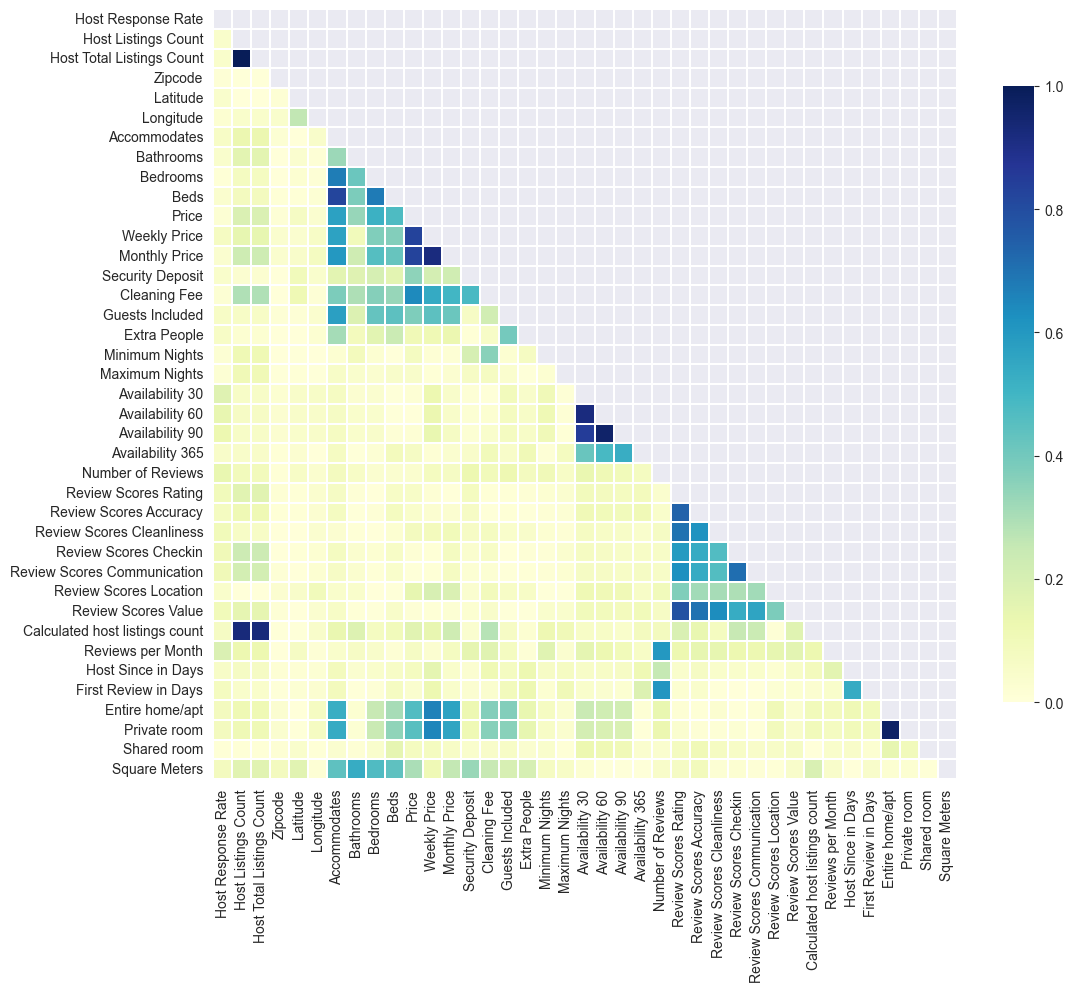

In [63]:
# Computamos la correlación
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

#### Vamos a ver que pasa si usamos imputación y vamos a graficar el antes y despues de la imputación

In [64]:
## Aplicación de missing values para la columna de Square Feet usando KNN y las variables que tienen una correlación mayor a 0.29 y menor a 1

# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = df_train.filter(['Square Meters','Bathrooms','Bedrooms','Accommodates','Beds', 'Price'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
df_knn_imputed
# Denormalize the data
df_knn_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_imputed), columns = df_knn_imputed.columns)
df_knn_imputed

Square Meters  Bathrooms  Bedrooms  Accommodates  Beds  Price
0           7.320756        1.0       1.0           2.0   2.0   24.0
1          72.984597        1.0       2.0           5.0   4.0  130.0
2          30.100572        1.0       1.0           2.0   1.0   45.0
3          11.780100        2.0       1.0           2.0   1.0   36.0
4          37.291264        1.0       1.0           2.0   1.0   62.0
...              ...        ...       ...           ...   ...    ...
10527      60.739981        1.0       1.0           2.0   2.0   38.0
10528      25.176713        1.0       1.0           3.0   2.0   50.0
10529      37.291264        1.0       1.0           2.0   1.0   60.0
10530      65.013519        1.0       2.0           4.0   2.0   89.0
10531      49.387235        1.0       1.0           2.0   1.0   25.0

[10532 rows x 6 columns]

#### Vamos a observar las distribuciones como quedan

<AxesSubplot: xlabel='Square Meters', ylabel='Density'>

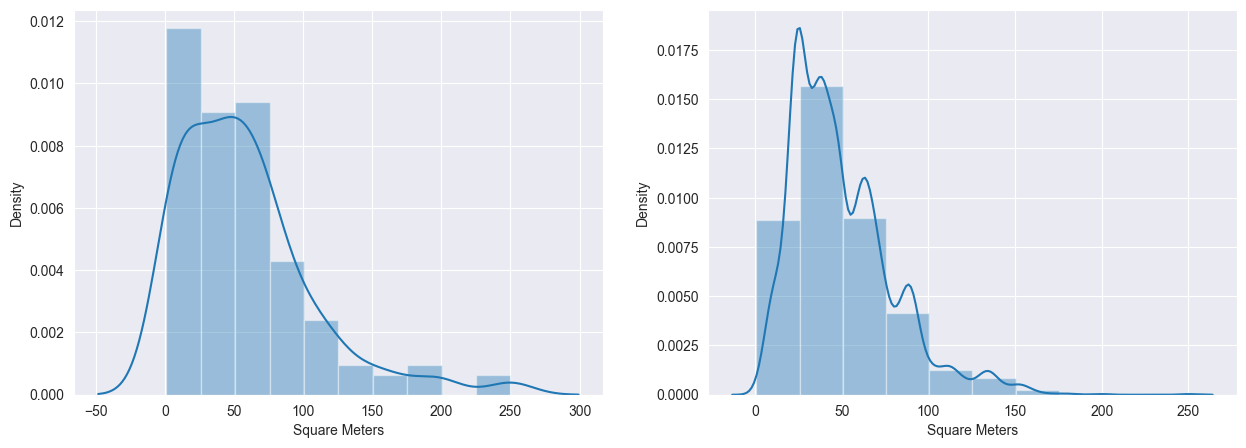

In [65]:
#sns.distplot(df_knn_imputed['Square Feet'], hist=True, kde=True, bins=10)
# Graficamos la funcion de densidad de probabilidad
#sns.distplot(df_train['Square Feet'], hist=True, kde=True, bins=10)
# Las graficas anteriores las ponemos en un subplot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_train['Square Meters'], hist=True, kde=True, bins=10, ax=ax[0])
sns.distplot(df_knn_imputed['Square Meters'], hist=True, kde=True, bins=10, ax=ax[1])

#### Vamos a observar como de distribuyen los puntos contrastando con la variable que tiene mas correlación con los metros cuadrados

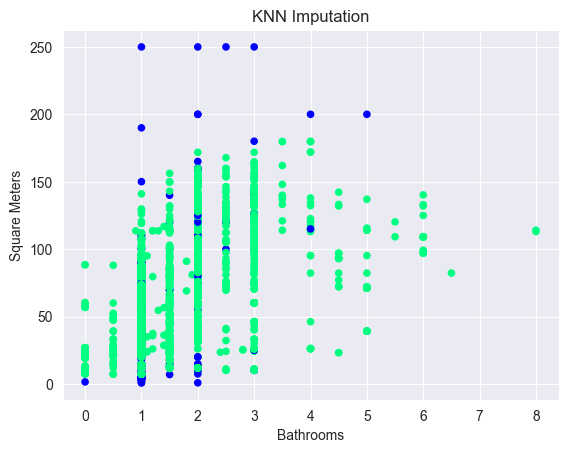

In [67]:
fig = plt.Figure()
null_values = df_train['Square Meters'].isnull()
fig = df_knn_imputed.plot(x='Bathrooms', y='Square Meters', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)


<AxesSubplot: xlabel='Square Meters', ylabel='Price'>

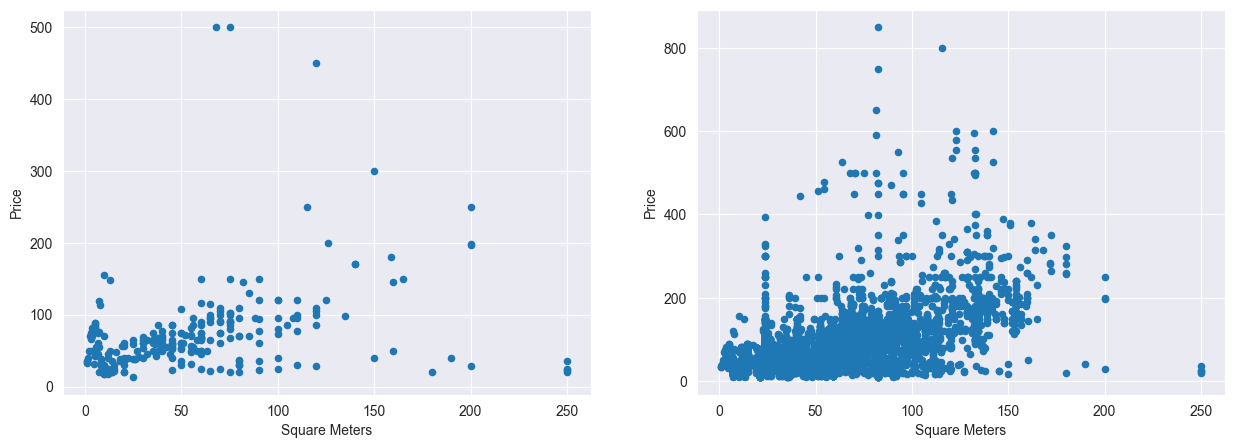

In [69]:
# Graficamos Square Meters contra el precio
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_train.plot(x='Square Meters', y='Price', kind='scatter', ax=ax[0])
df_knn_imputed.plot(x='Square Meters', y='Price', kind='scatter', ax=ax[1])


#### No se si tenga mucha coherencia, pero es valido, vamos a probar usando MICE

In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df_train.filter(['Square Meters','Bathrooms','Bedrooms','Accommodates','Beds', 'Price'], axis=1).copy()
# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

#fig = plt.Figure()
#null_values = df['MaxSpeed'].isnull()
#fig = df_mice_imputed.plot(x='AvgSpeed', y='MaxSpeed', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

<AxesSubplot: xlabel='Square Meters', ylabel='Density'>

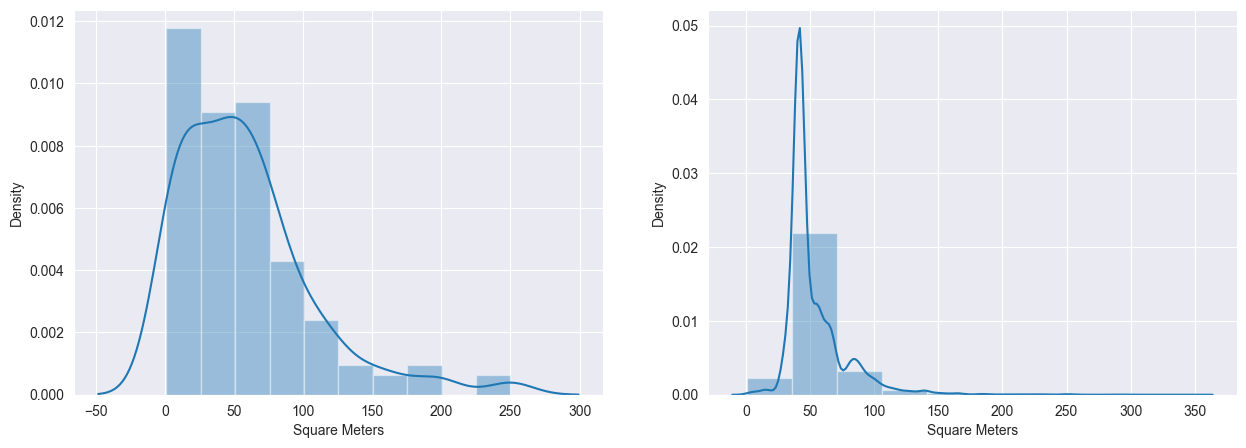

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Calculamos la similitud enntre la distribución de los datos originales y los datos imputados
sns.distplot(df_train['Square Meters'], hist=True, kde=True, bins=10, ax=ax[0])
sns.distplot(df_mice_imputed['Square Meters'], hist=True, kde=True, bins=10, ax=ax[1])

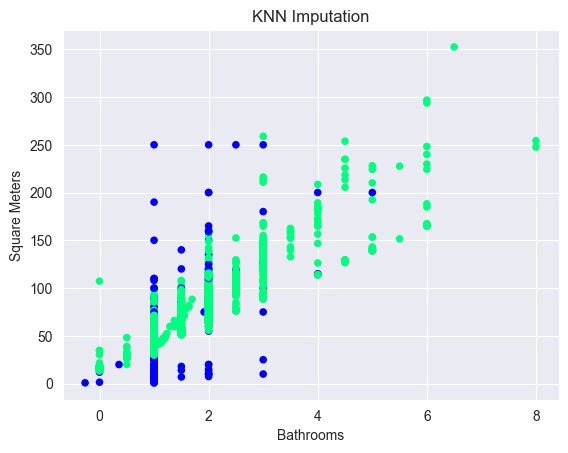

In [72]:
fig = plt.Figure()
null_values = df_train['Square Meters'].isnull()
fig = df_mice_imputed.plot(x='Bathrooms', y='Square Meters', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)


<AxesSubplot: xlabel='Square Meters', ylabel='Price'>

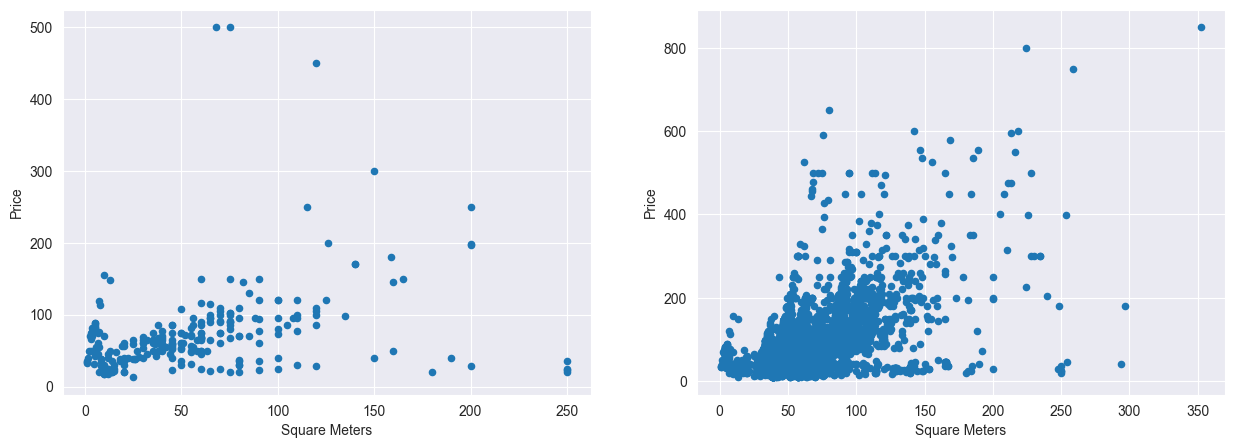

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_train.plot(x='Square Meters', y='Price', kind='scatter', ax=ax[0])
df_mice_imputed.plot(x='Square Meters', y='Price', kind='scatter', ax=ax[1])

#### Vamos a comparar KNN y MICE

<AxesSubplot: xlabel='Square Meters', ylabel='Price'>

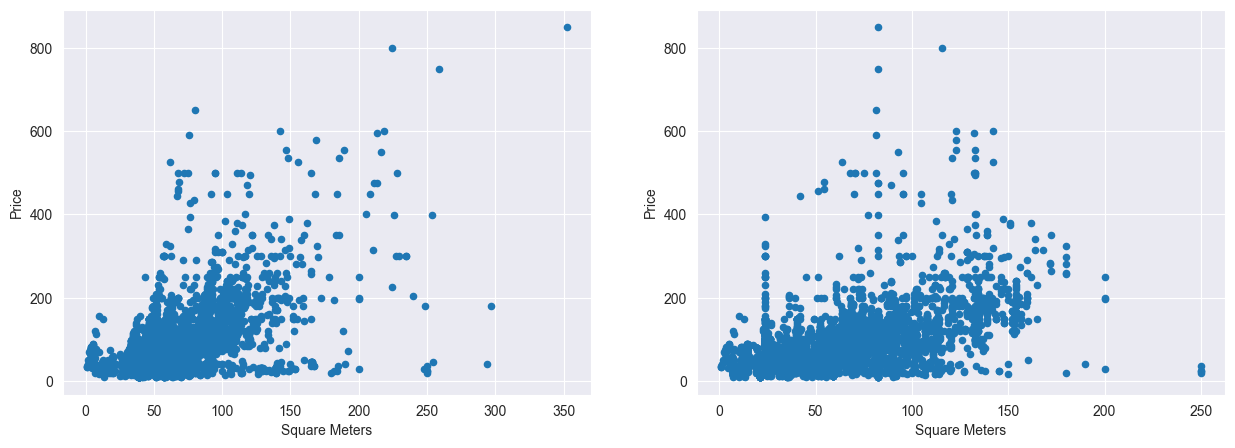

In [74]:
# Graficamos Square Feet contra el precio
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_mice_imputed.plot(x='Square Meters', y='Price', kind='scatter', ax=ax[0])
df_knn_imputed.plot(x='Square Meters', y='Price', kind='scatter', ax=ax[1])

<AxesSubplot: xlabel='Square Meters', ylabel='Bathrooms'>

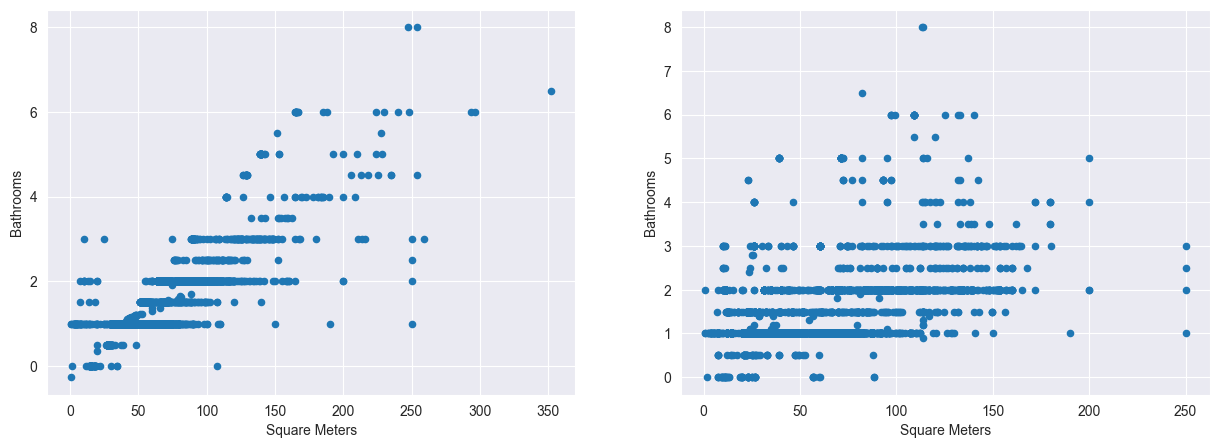

In [75]:
# Graficamos Square Feet contra el precio
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_mice_imputed.plot(x='Square Meters', y='Bathrooms', kind='scatter', ax=ax[0])
df_knn_imputed.plot(x='Square Meters', y='Bathrooms', kind='scatter', ax=ax[1])

#### Lo anterior, tiene sentido o no lo tiene, al parecer MICE se va mas lejos con los pies cuadrados, por lo que nos quedaremos con KNN que suena mas coherente

#### Vamos a realizar la reconstrucción de forma escalonada, primero con las variables que tienen menor missing, para ir incrementando el campo de busqueda para las que tienen mayor missing

In [77]:
# Hacemos loo mismoo para las siguientes variables
# Obtenemos en una lista las variables que queremos imputar a partir de la variable corr
# lista_columnas = corr['Square Feet'].sort_values(ascending=False).index.tolist()
# Vamos a obtener la lista de los porcentajes de valores faltantes ordenados de menor a mayor, vamos a ir recuperando datos de forma escalonada
lista_columnas = df_train.isnull().sum().sort_values(ascending=True).index.tolist()
# Vamos a recorrer la lista y conforme lo hagamos vamos a ir imputando los valores faltantes
corr = np.abs(df_train.corr())
# Hacemos una copia de nuestro dataframe
df_for_imputation = df_train.copy()
for columna in lista_columnas:
    columnas_relacionadas = corr[columna].sort_values(ascending=False).index.tolist()
    # Tomamos las columnas que tienen una correlación mayor a .39
    columnas_relacionadas = [x for x in columnas_relacionadas if corr[columna][x] > .29]
    # Tomamos las columnas que no son la columna que estamos analizando
    # columnas_relacionadas = [x for x in columnas_relacionadas if x != columna]
    print(f'Evaluando la columna {columna} con las variables relacionadas: {columnas_relacionadas}')
    # Creamos un dataframe con las variables que queremos imputar
    df_knn = df_for_imputation.filter(columnas_relacionadas, axis=1).copy()
    # Normalizamos los datos
    df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)
    # Define KNN imputer and fill missing values
    knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
    # Denormalize the data
    df_knn_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_imputed), columns = df_knn_imputed.columns)
    # Asignamos los valores imputados a la variable original
    df_for_imputation[columna] = df_knn_imputed[columna]


Evaluando la columna Availability 30 con las variables relacionadas: ['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']
Evaluando la columna Availability 90 con las variables relacionadas: ['Availability 90', 'Availability 60', 'Availability 30', 'Availability 365']
Evaluando la columna Availability 60 con las variables relacionadas: ['Availability 60', 'Availability 90', 'Availability 30', 'Availability 365']
Evaluando la columna Shared room con las variables relacionadas: ['Shared room']
Evaluando la columna Maximum Nights con las variables relacionadas: ['Maximum Nights']
Evaluando la columna Minimum Nights con las variables relacionadas: ['Minimum Nights', 'Cleaning Fee']
Evaluando la columna Extra People con las variables relacionadas: ['Extra People', 'Guests Included', 'Accommodates']
Evaluando la columna Guests Included con las variables relacionadas: ['Guests Included', 'Accommodates', 'Beds', 'Weekly Price', 'Bedrooms', 'Monthly Price', 'Extra Peopl

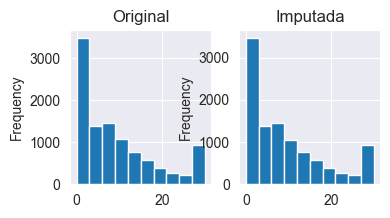

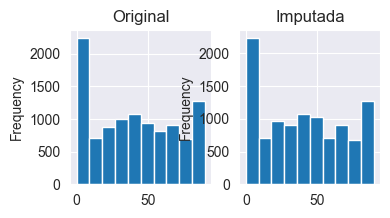

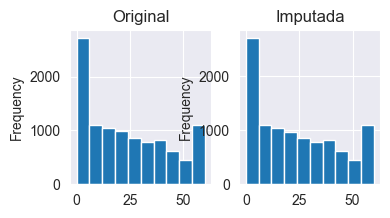

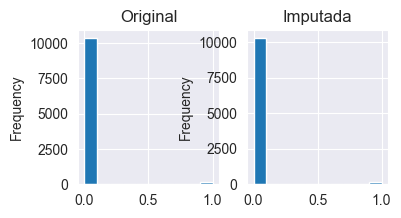

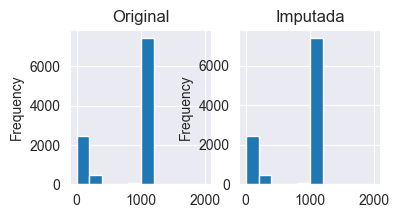

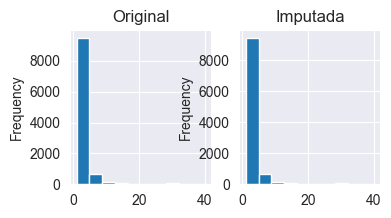

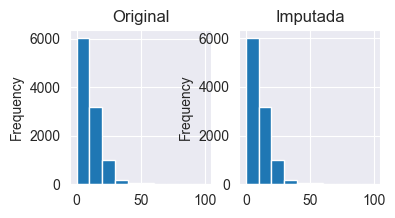

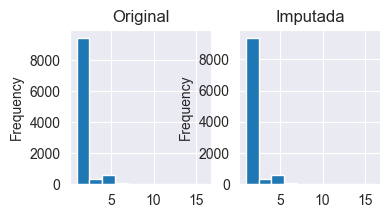

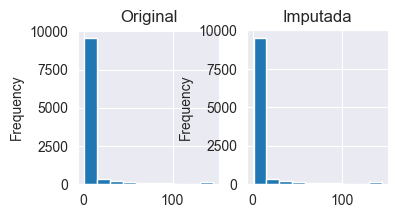

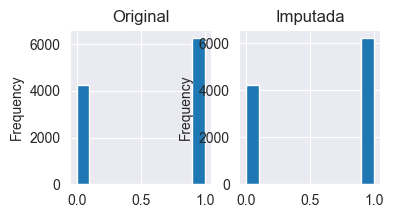

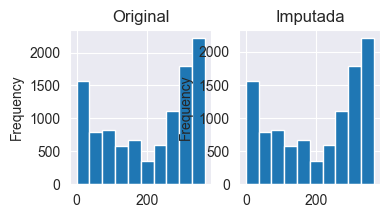

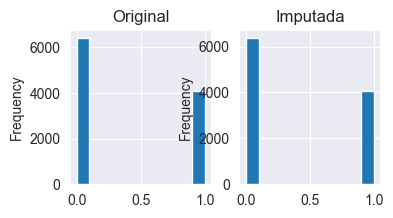

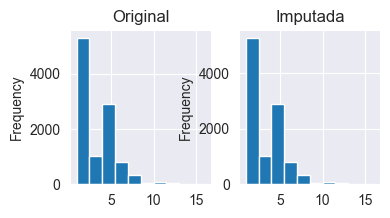

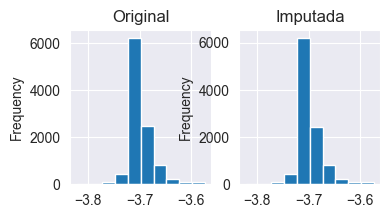

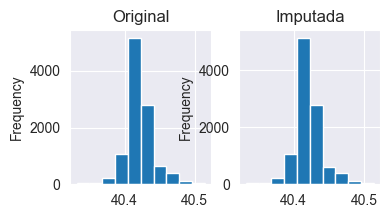

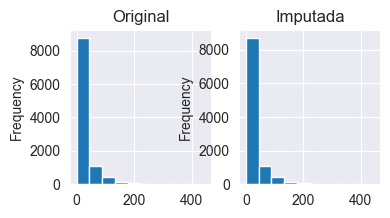

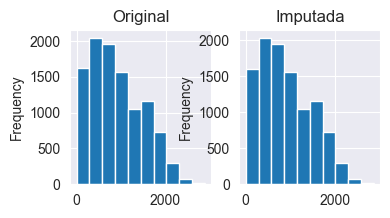

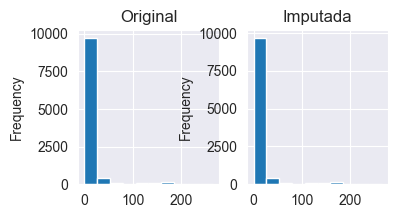

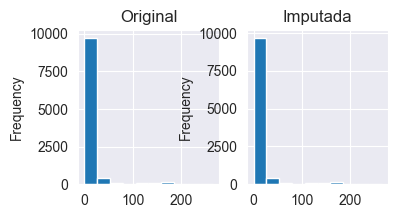

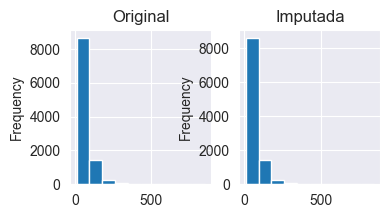

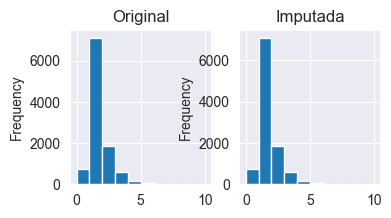

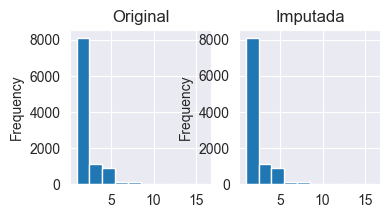

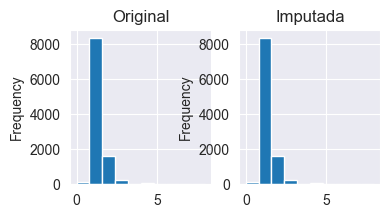

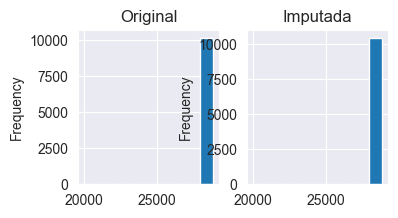

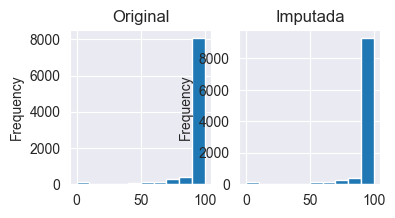

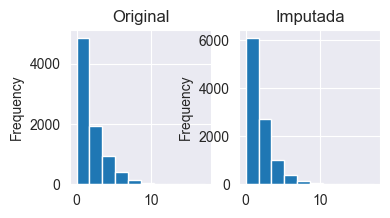

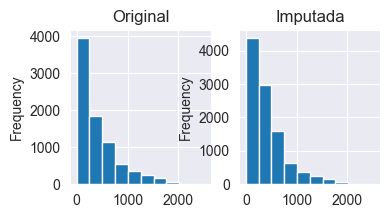

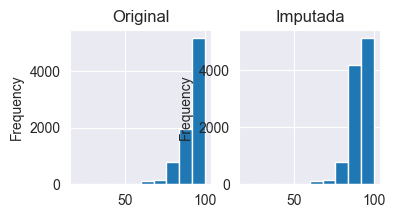

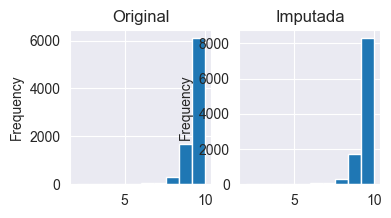

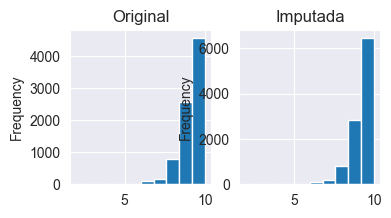

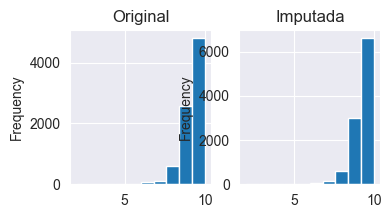

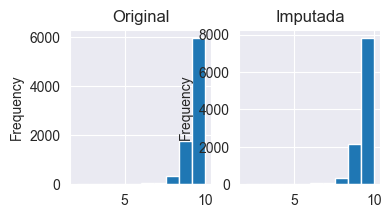

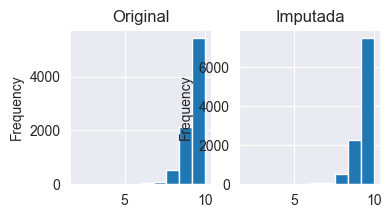

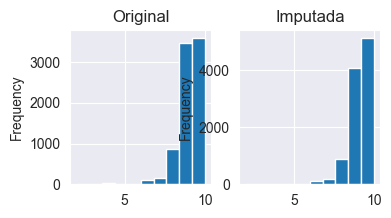

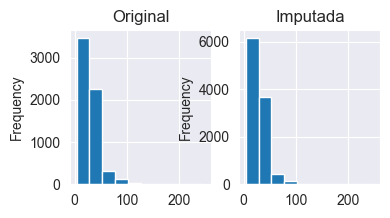

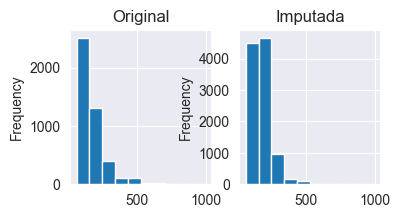

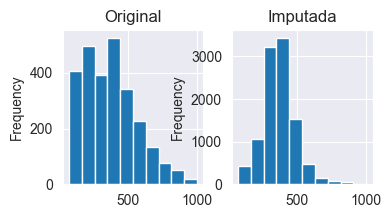

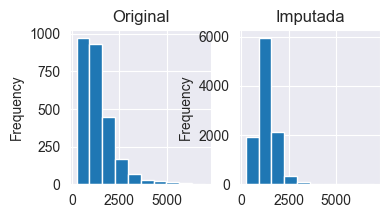

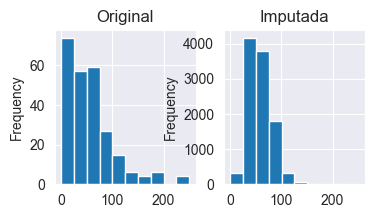

In [78]:
# Vamos a comparar cada una de las columnas por medio de su histograma entre la original y la imputada
for columna in lista_columnas:
    fig, ax = plt.subplots(1, 2, figsize=(4, 2))
    df_train[columna].plot(kind='hist', ax=ax[0])
    # Añaadimos un titulo a cada uno de los histogramas
    ax[0].set_title('Original')
    df_for_imputation[columna].plot(kind='hist', ax=ax[1])
    ax[1].set_title('Imputada')


<AxesSubplot: xlabel='Square Meters', ylabel='Density'>

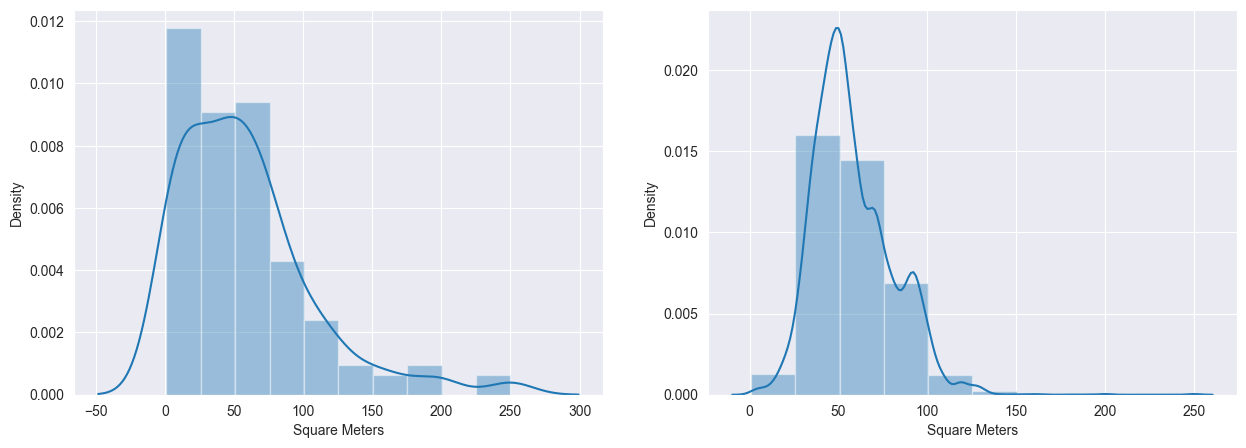

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Calculamos la similitud enntre la distribución de los datos originales y los datos imputados
sns.distplot(df_train['Square Meters'], hist=True, kde=True, bins=10, ax=ax[0])
sns.distplot(df_for_imputation['Square Meters'], hist=True, kde=True, bins=10, ax=ax[1])

In [80]:
# Guardamos los datos imputados y el train nuevo
df_for_imputation.to_csv('df_for_imputation.csv', index=False)
df_train.to_csv('df_train.csv', index=False)

### Lo anterior no se ve tan mal, es momento de hacer selección de variables